# 1. Preparation

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Setting option to display maximum of 25 columns from dataframe
pd.set_option('display.max_columns', 30)

In [3]:
# Setting chart background
sns.set_style('whitegrid')

In [4]:
# Importing dataset
superstore = pd.read_csv('datasets/superstore_raw.csv', encoding = 'unicode_escape')

In [5]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [6]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [7]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [8]:
superstore.describe(exclude = 'number')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


# 2. Data Cleaning

## 2.1. Row ID

First, I will try to look into 'Row ID' to see if this feature is the primary key of the data (no same data on different rows)

In [9]:
print(f"Amount of unique value within 'Row ID' feature is {superstore['Row ID'].nunique()}")

Amount of unique value within 'Row ID' feature is 51290


It looks that the 'Row ID' feature is unique for each row. Looking at the description table, it is obvious that this feature has value from 1 to 51290 (based on amount of rows). I will drop this feature.

In [10]:
# Dropping 'Row ID' feature
superstore.drop('Row ID', axis = 1, inplace = True)

## 2.2. Order ID, Order Date, Ship Date

I try to look the time frame for our data, amount of orders, and amount of customers that made transactions but first I will change the data types of 'Order Date' and 'Ship Date' features into datetime object. I assume that I can't extract any information from 'Ship Date' feature. So, I will make new feature named as 'Elapsed Time' which describes elapsed time between 'Order Date' and 'Ship Date' features. I will drop the 'Ship Date' feature.

In [11]:
# Changing type of 'Order Date' and 'Ship Date' features into datetime object
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], dayfirst = True)
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], dayfirst = True)

In [12]:
# Looking for starting and ending transaction date of the dataset
from datetime import datetime
min_date = superstore['Order Date'].min()
max_date = superstore['Order Date'].max()

print(f"Start date of transactions is {datetime.strftime(min_date, '%d %B %Y')} and the latest transaction is {datetime.strftime(max_date, '%d %B %Y')}")

Start date of transactions is 01 January 2011 and the latest transaction is 31 December 2014


In [13]:
# Making new feature named as 'Elapsed Time'
superstore['Elapsed Time'] = superstore[['Order Date', 
                                         'Ship Date']].apply(lambda x: (x['Ship Date'] - x['Order Date']).days, axis = 1)

In [14]:
# Dropping 'Ship Date' feature
superstore.drop('Ship Date', axis = 1, inplace = True)

I will check whether one 'Order ID' have more than one 'Order Date'

In [15]:
# Looking for transactions having one 'Order ID' with more than one 'Order Date'
amount_order = len(superstore.groupby('Order ID'))
order_multi_date = superstore.groupby('Order ID')['Order Date'].nunique() > 1

print(f"Amount of orders based on Order ID is {amount_order}")
print(f"Amount of transactions which has one Order ID with more than one Order Date is {order_multi_date.sum()}")

Amount of orders based on Order ID is 25035
Amount of transactions which has one Order ID with more than one Order Date is 659


There is actually some transactions with multiple dates. I will look into this.

In [16]:
# Sampling data with same 'Order ID' but with different 'Order Date'
import random
random_order_id = random.choice(order_multi_date[order_multi_date].index)

superstore[superstore['Order ID'] == random_order_id]

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Elapsed Time
14793,ES-2014-4794612,2014-12-03,Second Class,JC-15775,John Castell,Consumer,Pau,Aquitaine,France,NaN,EU,Central,OFF-SU-10000906,Office Supplies,Supplies,"Fiskars Shears, High Speed",238.200,5,0.0,116.700,19.11,Medium,5
14797,ES-2014-4794612,2014-12-03,Standard Class,BT-11395,Bill Tyler,Corporate,Antony,Ile-de-France,France,NaN,EU,Central,OFF-ST-10004695,Office Supplies,Storage,"Fellowes File Cart, Blue",370.737,3,0.1,123.507,15.32,Medium,4
14802,ES-2014-4794612,2014-12-03,Standard Class,BT-11395,Bill Tyler,Corporate,Antony,Ile-de-France,France,NaN,EU,Central,OFF-SU-10001889,Office Supplies,Supplies,"Kleencut Letter Opener, Easy Grip",229.440,8,0.0,27.360,9.13,Medium,4
14822,ES-2014-4794612,2014-12-03,Standard Class,BT-11395,Bill Tyler,Corporate,Antony,Ile-de-France,France,NaN,EU,Central,OFF-AR-10000711,Office Supplies,Art,"BIC Pens, Easy-Erase",101.850,7,0.0,22.260,5.02,Medium,4
14853,ES-2014-4794612,2014-12-03,Standard Class,BT-11395,Bill Tyler,Corporate,Antony,Ile-de-France,France,NaN,EU,Central,OFF-BI-10004722,Office Supplies,Binders,"Avery Index Tab, Clear",17.370,3,0.0,4.680,1.14,Medium,4
14854,ES-2014-4794612,2014-12-03,Standard Class,BT-11395,Bill Tyler,Corporate,Antony,Ile-de-France,France,NaN,EU,Central,OFF-FA-10001551,Office Supplies,Fasteners,"Stockwell Thumb Tacks, 12 Pack",25.140,2,0.0,7.740,1.03,Medium,4
39264,ES-2014-4794612,2014-06-24,Second Class,PS-18970,Paul Stevenson,Home Office,Nantes,Pays de la Loire,France,NaN,EU,Central,OFF-BI-10004801,Office Supplies,Binders,"Acco Binding Machine, Durable",262.950,5,0.0,63.000,19.68,Medium,2


Looking at the sample data above, I assume there were mistakes within the system that register same 'Order ID' for different orders. They even come from different customers so I am quite sure that these orders are actually different transactions. I assume there was probability of typos within 'Order ID' feature since it was unusual that one 'Order ID' occurred in different date. I will assign new 'Order ID' to these transactions. 

In [17]:
# Making dictionary for replacing 'Order ID'
dict_order = dict()

for od in order_multi_date[order_multi_date].index.to_list():
    dict_order[od] = dict()
    add = 1
    for od_date in superstore[superstore['Order ID'] == od].groupby('Order Date').count().index:
        dict_order[od][od_date] = od + str(add)
        add += 1

In [18]:
# Reassigning new 'Order ID'
def clean_id(col):
    if col['Order ID'] in dict_order.keys():
        return dict_order[col['Order ID']][col['Order Date']]
    else:
        return col['Order ID']
        
superstore['Order ID'] = superstore[['Order ID','Order Date']].apply(clean_id, axis = 1) 

In [19]:
# Rechecking if there were still transaction with more than one 'Order Date'
amount_order = len(superstore.groupby('Order ID'))
order_multi_date = superstore.groupby('Order ID')['Order Date'].nunique() > 1

print(f"Amount of orders based on Order ID is {amount_order}")
print(f"Amount of transactions which has one Order ID with more than one Order Date is {order_multi_date.sum()}")

Amount of orders based on Order ID is 25752
Amount of transactions which has one Order ID with more than one Order Date is 0


It seems there were no more transactions having one 'Order ID' with multiple dates.

## 2.3. Ship Mode, Order Priority

First, I will look if one Order ID has multiple shipping mode, order priority, and elapsed time.

In [20]:
# Looking for 'Order ID' which has several shipping mode
order_multi_ship = superstore.groupby('Order ID')['Ship Mode'].nunique() > 1
print(f"Amount of transactions with different shipping mode is {order_multi_ship.sum()}")

Amount of transactions with different shipping mode is 2


In [21]:
# Looking for 'Order ID' which has several priorities
order_multi_prio = superstore.groupby('Order ID')['Order Priority'].nunique() > 1
print(f"Amount of transactions with different priorities is {order_multi_prio.sum()}")

Amount of transactions with different priorities is 1


In [22]:
# Looking for 'Order ID' which has several elapsed time
order_multi_time = superstore.groupby('Order ID')['Elapsed Time'].nunique() > 1
print(f"Amount of transactions with different elapsed time is {order_multi_time.sum()}")

Amount of transactions with different elapsed time is 2


From the summary above, there are exactly 2 transactions having one 'Order ID' but different shipping mode and elapsed time. There are only 1 transaction with different priorities. I will check if all these transactions are the same.

In [23]:
# Checking index of the 2 transactions
print(f"Indexes of transactions with different shipping mode are {' & '.join(order_multi_ship[order_multi_ship].index)}")
print(f"Indexes of transactions with different priorities are {' & '.join(order_multi_ship[order_multi_prio].index)}")
print(f"Indexes of transactions with different elapsed time are {' & '.join(order_multi_ship[order_multi_time].index)}")

Indexes of transactions with different shipping mode are ES-2014-47946122 & ES-2014-5886915
Indexes of transactions with different priorities are ES-2014-5886915
Indexes of transactions with different elapsed time are ES-2014-47946122 & ES-2014-5886915


Looks like all of the 2 transactions (same shipping mode, priorities, and elapsed time) have the same indexes. I will assign new 'Order ID' just like in previous section.

In [24]:
# Making dictionary for replacing new 'Order ID'
dict_ship = dict()

for od in order_multi_ship[order_multi_ship].index.to_list():
    dict_ship[od] = dict()
    add = 1
    for od_ship in superstore[superstore['Order ID'] == od]['Ship Mode'].unique():
        dict_ship[od][od_ship] = od + str(add)
        add += 1

In [25]:
# Reassigning new 'Order ID'
def clean_id(col):
    if col['Order ID'] in dict_ship.keys():
        return dict_ship[col['Order ID']][col['Ship Mode']]
    else:
        return col['Order ID']
        
superstore['Order ID'] = superstore[['Order ID','Ship Mode']].apply(clean_id, axis = 1) 

In [26]:
# Rechecking if there were still transaction with more than one shipping mode
amount_order = len(superstore.groupby('Order ID'))
order_multi_ship = superstore.groupby('Order ID')['Ship Mode'].nunique() > 1

print(f"Amount of orders based on Order ID is {amount_order}")
print(f"Amount of transactions which has one Order ID with more than one shipping mode is {order_multi_ship.sum()}")

Amount of orders based on Order ID is 25754
Amount of transactions which has one Order ID with more than one shipping mode is 0


It seems there were no more transactions having one 'Order ID' with different shipping modes, priorities, and elapsed time.

## 2.4. Customer ID, Customer Name, Segment

First, I will check whether one 'Order ID' have more than one 'Customer Name'

In [27]:
# Looking for transactions having one 'Order ID' with more than one 'Customer Name'
amount_order = len(superstore.groupby('Order ID'))
order_multi_name = superstore.groupby('Order ID')['Customer ID'].nunique() > 1

print(f"Amount of orders based on Order ID is {amount_order}")
print(f"Amount of transactions which has one Order ID with more than one Customer ID is {order_multi_name.sum()}")

Amount of orders based on Order ID is 25754
Amount of transactions which has one Order ID with more than one Customer ID is 0


It seems there were no transactions having one 'Order ID' with different 'Customer ID'. Next, looking at the description table, there are greater amount of unique 'Customer ID' (1590) than unique 'Customer Name' (795). I will try to look into this.

In [28]:
# Looking for customers having more than one 'Customer ID'
name_multi_id = superstore.groupby('Customer Name')['Customer ID'].nunique() > 1

print(f'Amount of customers who have more than one Customer ID is {name_multi_id.sum()}')

Amount of customers who have more than one Customer ID is 795


It looks like that all of our customers have more than 1 ID. Since amount of 'Customer ID' is exactly twice as the amount of 'Customer Name', I can conclude that each customer has exactly 2 customer IDs. I will try to look to some of these double IDs.

In [29]:
# Listing IDs of each customer
for name in superstore['Customer Name'].unique():
    print(f"Customer: {name}, ID: {' & '.join(list(superstore[superstore['Customer Name'] == name]['Customer ID'].unique()))}")

Customer: Toby Braunhardt, ID: TB-11280 & TB-21280
Customer: Joseph Holt, ID: JH-15985 & JH-5985
Customer: Annie Thurman, ID: AT-735 & AT-10735
Customer: Eugene Moren, ID: EM-14140 & EM-4140
Customer: Patrick O'Donnell, ID: PO-18865 & PO-8865
Customer: Liz Carlisle, ID: LC-17050 & LC-7050
Customer: David Kendrick, ID: DK-3150 & DK-13150
Customer: Stephanie Phelps, ID: SP-20650 & SP-10650
Customer: Dave Hallsten, ID: DH-13075 & DH-3075
Customer: Patrick O'Brill, ID: PO-8850 & PO-18850
Customer: Gene Hale, ID: GH-14485 & GH-4485
Customer: Ralph Ritter, ID: RR-19315 & RR-9315
Customer: Ionia McGrath, ID: IM-15055 & IM-5055
Customer: Tom Prescott, ID: TP-11415 & TP-21415
Customer: Todd Sumrall, ID: TS-21370 & TS-11370
Customer: Ruben Dartt, ID: RD-9900 & RD-19900
Customer: Tom Boeckenhauer, ID: TB-21400 & TB-11400
Customer: Vicky Freymann, ID: VF-21715 & VF-11715
Customer: Katherine Hughes, ID: KH-16360 & KH-6360
Customer: Dave Brooks, ID: DB-13060 & DB-3060
Customer: Giulietta Weimer, ID:

Customer: Anna Häberlin, ID: AH-10690 & AH-690
Customer: Christine Sundaresam, ID: CS-2355 & CS-12355
Customer: Pamela Coakley, ID: PC-18745 & PC-8745
Customer: Sam Craven, ID: SC-20020 & SC-10020
Customer: Jason Klamczynski, ID: JK-15325 & JK-5325
Customer: Cari Schnelling, ID: CS-11860 & CS-1860
Customer: Bill Donatelli, ID: BD-11320 & BD-1320
Customer: Richard Bierner, ID: RB-9435 & RB-19435
Customer: Roger Demir, ID: RD-19720 & RD-9720
Customer: Rick Hansen, ID: RH-19495 & RH-9495
Customer: Valerie Dominguez, ID: VD-21670 & VD-11670
Customer: Rick Huthwaite, ID: RH-9510 & RH-19510
Customer: Jay Fein, ID: JF-15355 & JF-5355
Customer: George Ashbrook, ID: GA-4515 & GA-14515
Customer: Benjamin Venier, ID: BV-11245 & BV-1245
Customer: Caroline Jumper, ID: CJ-12010 & CJ-2010
Customer: Stewart Visinsky, ID: SV-20785 & SV-10785
Customer: Rick Bensley, ID: RB-19465 & RB-9465
Customer: Bruce Stewart, ID: BS-11755 & BS-1755
Customer: Berenike Kampe, ID: BK-11260 & BK-1260
Customer: Dorothy W

Customer: Maya Herman, ID: MH-17785 & MH-7785
Customer: Arthur Prichep, ID: AP-10915 & AP-915
Customer: Arthur Wiediger, ID: AW-10930 & AW-930
Customer: Grant Thornton, ID: GT-14635 & GT-4635
Customer: Darren Powers, ID: DP-13000 & DP-3000
Customer: Jasper Cacioppo, ID: JC-5340 & JC-15340
Customer: Tom Stivers, ID: TS-11430 & TS-21430
Customer: Brad Thomas, ID: BT-11485 & BT-1485
Customer: Brad Eason, ID: BE-11455 & BE-1455
Customer: Darrin Martin, ID: DM-13015 & DM-3015
Customer: Pierre Wener, ID: PW-9240 & PW-19240
Customer: Liz Preis, ID: LP-17095 & LP-7095
Customer: Andrew Gjertsen, ID: AG-10495 & AG-495
Customer: Dianna Arnett, ID: DA-3450 & DA-13450
Customer: Barry Weirich, ID: BW-11065 & BW-1065
Customer: Ken Black, ID: KB-16585 & KB-6585
Customer: Maurice Satty, ID: MS-17710 & MS-7710
Customer: Carl Ludwig, ID: CL-1890 & CL-11890
Customer: Bobby Trafton, ID: BT-1440 & BT-11440
Customer: Paul Knutson, ID: PK-18910 & PK-8910
Customer: Denny Joy, ID: DJ-13420 & DJ-3420
Customer: S

Customer: Maureen Gnade, ID: MG-7695 & MG-17695
Customer: Toby Swindell, ID: TS-21340 & TS-11340
Customer: Nora Pelletier, ID: NP-18685 & NP-8685
Customer: Filia McAdams, ID: FM-14215 & FM-4215
Customer: Liz Willingham, ID: LW-17125 & LW-7125
Customer: Pauline Johnson, ID: PJ-19015 & PJ-9015
Customer: Daniel Raglin, ID: DR-12940 & DR-2940
Customer: Todd Boyes, ID: TB-21355 & TB-11355
Customer: Dana Kaydos, ID: DK-12895 & DK-2895
Customer: Neil Knudson, ID: NK-18490 & NK-8490
Customer: Nick Radford, ID: NR-18550 & NR-8550
Customer: Stephanie Ulpright, ID: SU-20665 & SU-10665
Customer: Sung Chung, ID: SC-20845 & SC-10845
Customer: Darren Koutras, ID: DK-12985 & DK-2985
Customer: Bart Pistole, ID: BP-11095 & BP-1095
Customer: Erica Bern, ID: EB-13975 & EB-3975
Customer: Charles McCrossin, ID: CM-12160 & CM-2160
Customer: Greg Tran, ID: GT-14710 & GT-4710
Customer: Sean Braxton, ID: SB-20290 & SB-10290
Customer: Shahid Shariari, ID: SS-20410 & SS-10410
Customer: Phillip Breyer, ID: PB-1921

Customer: Nicole Brennan, ID: NB-8580 & NB-18580
Customer: Michelle Arnett, ID: MA-7995 & MA-17995
Customer: Tom Ashbrook, ID: TA-21385 & TA-11385
Customer: Brad Norvell, ID: BN-11470 & BN-1470
Customer: Carl Jackson, ID: CJ-1875 & CJ-11875
Customer: Bradley Nguyen, ID: BN-1515 & BN-11515
Customer: Pete Takahito, ID: PT-19090 & PT-9090
Customer: Penelope Sewall, ID: PS-19045 & PS-9045
Customer: Noel Staavos, ID: NS-8640 & NS-18640
Customer: Rob Beeghly, ID: RB-19570 & RB-9570
Customer: Joseph Airdo, ID: JA-15970 & JA-5970
Customer: Roy Französisch, ID: RF-19840 & RF-9840
Customer: Darren Budd, ID: DB-12970 & DB-2970
Customer: Annie Zypern, ID: AZ-750 & AZ-10750
Customer: Ryan Akin, ID: RA-19945 & RA-9945
Customer: Joni Wasserman, ID: JW-15955 & JW-5955
Customer: Roland Murray, ID: RM-9750 & RM-19750
Customer: David Bremer, ID: DB-13120 & DB-3120
Customer: Erica Smith, ID: ES-14020 & ES-4020
Customer: Keith Dawkins, ID: KD-16495 & KD-6495
Customer: Justin Ellison, ID: JE-16165 & JE-6165

Looking above, I assume there are typos within 'Customer ID' feature (Most of them are either missing or mistyped 1 digit. When the ID number is led by 0, it will be omitted). Let's take a look to one of the customers.

In [30]:
# Sampling data of one customer with multiple customer IDs
superstore[superstore['Customer Name'] == superstore['Customer Name'].sample().values[0]]

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Elapsed Time
1760,ES-2011-3291135,2011-12-06,Standard Class,PF-19165,Philip Fox,Consumer,Stockport,England,United Kingdom,NaN,EU,North,OFF-BI-10000179,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",27.9900,1,0.00,9.2100,1.99,Medium,6
2992,US-2011-163874,2011-01-11,First Class,PF-19165,Philip Fox,Consumer,San Pablo de las Salinas,México,Mexico,NaN,LATAM,North,OFF-ST-10003741,Office Supplies,Storage,"Smead Lockers, Blue",1322.8000,10,0.00,238.0000,103.84,Medium,1
2993,US-2011-163874,2011-01-11,First Class,PF-19165,Philip Fox,Consumer,San Pablo de las Salinas,México,Mexico,NaN,LATAM,North,FUR-BO-10002214,Furniture,Bookcases,"Dania Floating Shelf Set, Traditional",451.6000,5,0.20,-107.3000,57.75,Medium,1
2996,US-2011-163874,2011-01-11,First Class,PF-19165,Philip Fox,Consumer,San Pablo de las Salinas,México,Mexico,NaN,LATAM,North,TEC-PH-10002755,Technology,Phones,"Apple Headset, VoIP",244.5000,5,0.00,88.0000,39.11,Medium,1
3006,US-2011-163874,2011-01-11,First Class,PF-19165,Philip Fox,Consumer,San Pablo de las Salinas,México,Mexico,NaN,LATAM,North,OFF-AP-10000569,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Black",139.8000,3,0.00,32.1000,6.47,Medium,1
4460,IN-2012-45979,2012-10-03,Standard Class,PF-19165,Philip Fox,Consumer,Lucknow,Uttar Pradesh,India,NaN,APAC,Central Asia,TEC-PH-10003481,Technology,Phones,"Apple Office Telephone, Full Size",532.5600,8,0.00,85.2000,54.94,Medium,6
4477,IN-2012-45979,2012-10-03,Standard Class,PF-19165,Philip Fox,Consumer,Lucknow,Uttar Pradesh,India,NaN,APAC,Central Asia,OFF-EN-10004053,Office Supplies,Envelopes,"GlobeWeis Manila Envelope, with clear poly window",123.7200,4,0.00,33.3600,7.45,Medium,6
4757,SF-2012-8630,2012-08-04,Standard Class,PF-9165,Philip Fox,Consumer,Johannesburg,Gauteng,South Africa,NaN,Africa,Africa,OFF-ROG-10004949,Office Supplies,Storage,"Rogers Shelving, Industrial",125.2200,2,0.00,37.5600,8.37,Medium,6
4762,SF-2012-8630,2012-08-04,Standard Class,PF-9165,Philip Fox,Consumer,Johannesburg,Gauteng,South Africa,NaN,Africa,Africa,OFF-TEN-10000360,Office Supplies,Storage,"Tenex Folders, Wire Frame",22.2900,1,0.00,10.6800,1.93,Medium,6
4812,US-2012-105613,2012-09-04,Second Class,PF-19165,Philip Fox,Consumer,Buenos Aires,Buenos Aires,Argentina,NaN,LATAM,South,OFF-LA-10002980,Office Supplies,Labels,"Harbour Creations Shipping Labels, Alphabetical",9.0240,2,0.40,-4.8160,0.33,Medium,2


Loooking at the sample data above, there seems to be typos within 'Customer ID' feature since there is no significant difference between the 2 IDs. I also look into 'Segment' feature to see whether one unique customer falls under more than one segment. I assume that if the customers with same name have more than 1 ID, there is possibility that they fall under different segment.

In [31]:
# Looking for customers having more than one 'Segment'
cust_multi_seg = superstore.groupby('Customer Name')['Segment'].nunique() > 1

print(f'Amount of customers who have more than one Segment is {cust_multi_seg.sum()}')

Amount of customers who have more than one Segment is 0


There are actually no customers with same names whom fall under different segment so I am quite sure that there are typos within 'Customer ID' feature. I will reassign 'Customer ID' feature so that 1 customer only has one customer ID.

In [32]:
# Reassigning new 'Customer ID'
cust_id = dict()

for name in superstore['Customer Name'].unique():
    id_double = list(superstore[superstore['Customer Name'] == name]['Customer ID'].unique())
    if len(id_double[0]) >= len(id_double[1]):
        cust_id[name] = id_double[0]
    else:
        cust_id[name] = id_double[1]

superstore['Customer ID'] = superstore['Customer Name'].replace(cust_id)

In [33]:
# Rechecking if there were still customers with more than one ID
name_multi_id = superstore.groupby('Customer Name')['Customer ID'].nunique() > 1

print(f'Amount of customers who have more than one Customer ID is {name_multi_id.sum()}')

Amount of customers who have more than one Customer ID is 0


It seems there were no more customers having one 'Customer Name' with multiple customer IDs.

In [34]:
# Counting total customer and transaction in the dataset
print(f"Amount of customers doing transactions between {min_date.year} - {max_date.year} is {superstore['Customer ID'].nunique()}")
print(f"Amount of transactions done between {min_date.year} - {max_date.year} is {superstore['Order ID'].nunique()}")

Amount of customers doing transactions between 2011 - 2014 is 795
Amount of transactions done between 2011 - 2014 is 25754


## 2.5. City, State, Country, Market, Region

First, I will look if one Order ID has multiple countries.

In [35]:
# Looking for 'Order ID' which has several countries
od_multi_country = superstore.groupby('Order ID')['Country'].nunique() > 1

print(f"Amount of transactions with different countries is {od_multi_country.sum()}")

Amount of transactions with different countries is 0


Looking at description table, 'City' and 'State' features have too many unique values. I will drop these features and use 'Country' feature to describe locations. 

In [36]:
# Listing regions for each market
for market in superstore['Market'].unique():
    print(f"Market: {market} consists of Region(s): {', '.join(superstore[superstore['Market'] == market]['Region'].unique())}")

Market: Africa consists of Region(s): Africa
Market: APAC consists of Region(s): Oceania, Central Asia, North Asia, Southeast Asia
Market: EMEA consists of Region(s): EMEA
Market: EU consists of Region(s): North, Central, South
Market: US consists of Region(s): West, Central, East, South
Market: LATAM consists of Region(s): Central, South, North, Caribbean
Market: Canada consists of Region(s): Canada


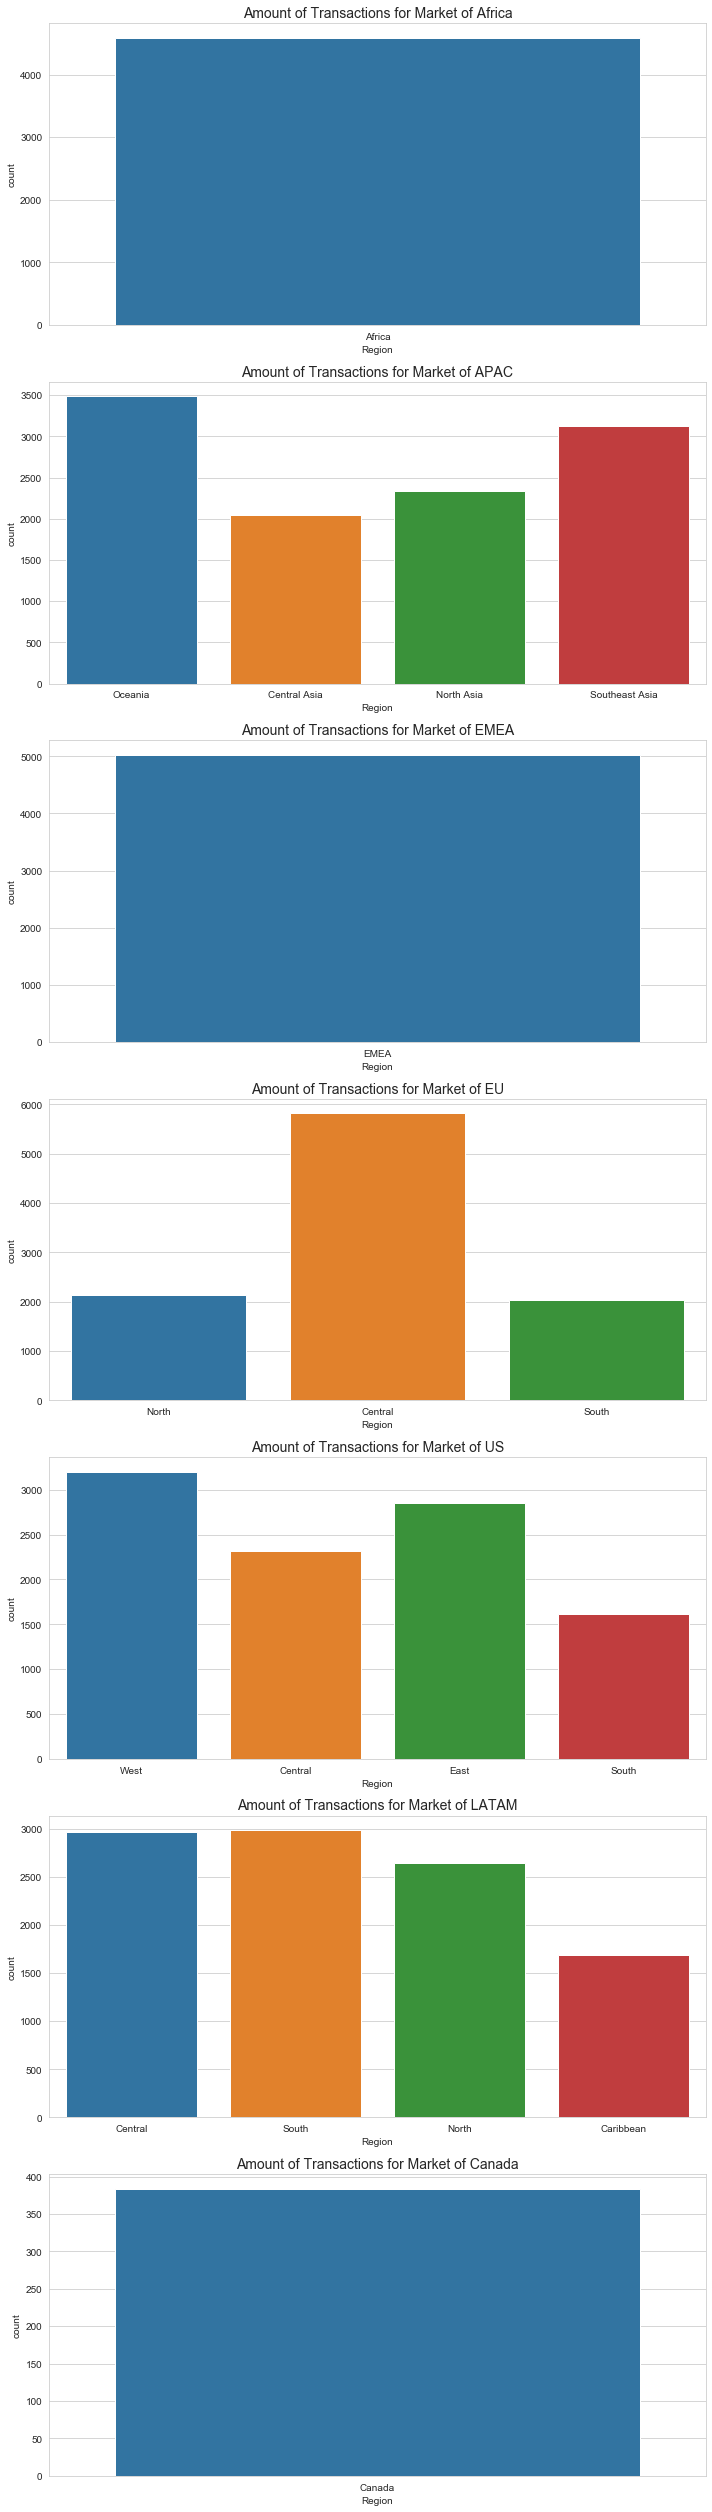

In [37]:
# Amount of transactions based on 'Market' feature with different 'Region'
fig, ax = plt.subplots(7, 1, figsize = (10, 35))
for idx, val in enumerate(superstore['Market'].unique()):
    sns.countplot(superstore[superstore['Market'] == val]['Region'], ax = ax[idx])
    ax[idx].set_title(f'Amount of Transactions for Market of {val}', fontsize = 14)
plt.tight_layout()

Looking at the summary above, there are three markets (Africa, Canada, EMEA) which have same values as the regions. We also look into US Market and it only contains one country which is United States. I will only keep 'Country' and 'Market' features for later use.

In [38]:
# Dropping 'City', 'State', and 'Region' features
superstore.drop(['City', 'State', 'Region'], axis = 1, inplace = True)

I will check if there were countries that fell under different markets.

In [39]:
# Looking for countries with different markets
data_country  = list()
for i in superstore['Country'].unique():
    if superstore[superstore['Country'] == i]['Market'].nunique() > 1:
        data_country.append(i)
        
print(f"Countries with different markets are {' and '.join(data_country)}")

Countries with different markets are Austria and Mongolia


There are 2 countries that fell under different markets which are Austria (EU and EMEA) and Mongolia (EMEA and APAC). I will assign Austria strictly to EMEA while Mongolia will be strictly assigned to APAC.

In [40]:
# Reassigning so that one country only has one market
def change_market(data):
    if data['Country'] == 'Austria':
        return 'EMEA'
    elif data['Country'] == 'Mongolia':
        return 'APAC'
    else:
        return data['Market']

superstore['Market'] = superstore[['Country', 'Market']].apply(change_market, axis = 1)

In [41]:
# Rechecking for countries with different markets
data_country  = list()
for i in superstore['Country'].unique():
    if superstore[superstore['Country'] == i]['Market'].nunique() > 1:
        data_country.append(i)
        
print(f'Total countries with different markets are {len(data_country)}')

Total countries with different markets are 0


When looking into 'Customer ID' and 'Customer Name' features, I see something peculiar. One customer can have multiple countries. I also assume there is possibility that location features (e.g. 'Country', 'Market', 'Region', etc.) describes origin of the products. I will look into this.

In [42]:
# Listing countries of one customer
superstore[superstore['Customer Name'] == superstore['Customer Name'].sample().values[0]]['Country'].value_counts()

Iraq             11
Philippines       8
United States     8
Australia         4
India             4
Iran              4
Italy             3
Austria           3
China             3
Egypt             2
Russia            2
Bulgaria          2
Mexico            2
France            2
Nigeria           2
Spain             2
South Africa      1
Chile             1
Mozambique        1
Saudi Arabia      1
Poland            1
Name: Country, dtype: int64

In [43]:
# Listing countries of one product
superstore[superstore['Product Name'] == superstore['Product Name'].sample().values[0]]['Country'].value_counts()

United States    8
Name: Country, dtype: int64

Looking at the summary above, I conclude that location features (e.g. 'Country', 'Market', 'Region', etc.) described neither origin of the customers nor origin of the products. I assume that these features actually described destination of the deliveries.  

## 2.6. Postal Code

Looking at information of the data, 'Postal Code' is the only feature that has missing values. I have assumption that since the store originates from USA, only orders from/to the said country will have postal code. I will check into this.

In [44]:
# Checking amount of Null values within each feature
superstore.isna().sum()

Order ID              0
Order Date            0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Country               0
Postal Code       41296
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Elapsed Time          0
dtype: int64

In [45]:
# Checking countries which have values for their 'Postal Code' feature  
superstore[superstore['Postal Code'].notna()]['Country'].unique()

array(['United States'], dtype=object)

In [46]:
# Checking 'Postal Code' feature for orders outside from USA
superstore[~(superstore['Country'] == 'United States')]['Postal Code'].unique()

array([nan])

It seems that my assumption is true. I will drop this feature since there is another feature that better represent locations (e.g. 'Country').

In [47]:
# Dropping 'Postal Code' feature
superstore.drop('Postal Code', axis = 1, inplace = True)

## 2.7. Category, Sub-Category, Product ID, Product Name

Same as customers, there are greater amount of unique 'Product ID' (10292) than unique 'Product Name' (3788). I will look into this.

In [48]:
# Listing sub-categories for each product's category
for cat in superstore['Category'].unique():
    print(f"Category: {cat} consists of Sub-Categories: {', '.join(superstore[superstore['Category'] == cat]['Sub-Category'].unique())}")

Category: Office Supplies consists of Sub-Categories: Storage, Supplies, Paper, Appliances, Art, Binders, Labels, Envelopes, Fasteners
Category: Furniture consists of Sub-Categories: Furnishings, Bookcases, Chairs, Tables
Category: Technology consists of Sub-Categories: Copiers, Accessories, Machines, Phones


In [49]:
# Making a list contains products with more than one ID
prod_multi_id = superstore.groupby('Product Name')['Product ID'].nunique() > 1

print(f'Amount of products which has more than one ID is {prod_multi_id.sum()}')

Amount of products which has more than one ID is 1944


It looks like that some of the products have more than 1 ID. I will look into this.

In [50]:
# Listing product's IDs for each product
for name in superstore['Product Name'].unique():
    print(f"Product: {name}, ID: {', '.join(superstore[superstore['Product Name'] == name]['Product ID'].unique())}")

Product: Tenex Lockers, Blue, ID: OFF-TEN-10000025, OFF-ST-10003295, OFF-ST-10004191, OFF-ST-10003929
Product: Acme Trimmer, High Speed, ID: OFF-SU-10000618, OFF-SU-10001879, OFF-ACM-10003978, OFF-SU-10002983, OFF-SU-10001124
Product: Tenex Box, Single Width, ID: OFF-TEN-10001585, OFF-ST-10003810, OFF-ST-10001066, OFF-ST-10001597
Product: Enermax Note Cards, Premium, ID: OFF-PA-10001492, OFF-PA-10003115, OFF-ENE-10002922, OFF-PA-10003731, OFF-PA-10003475, OFF-PA-10004296, OFF-PA-10000527, OFF-PA-10001758, OFF-ENE-10002104, OFF-PA-10003517
Product: Eldon Light Bulb, Duo Pack, ID: FUR-FU-10003447, FUR-FU-10004313, FUR-ELD-10003695, FUR-FU-10004450
Product: Eaton Computer Printout Paper, 8.5 x 11, ID: OFF-PA-10001968, OFF-PA-10001466, OFF-EAT-10000652, OFF-PA-10004155, OFF-PA-10003556
Product: Brother Personal Copier, Laser, ID: TEC-CO-10002316, TEC-CO-10002089, TEC-BRO-10001293, TEC-CO-10000777
Product: Sauder Facets Collection Library, Sky Alder Finish, ID: FUR-BO-10003966
Product: Fell

Product: Ikea 3-Shelf Cabinet, Metal, ID: FUR-BO-10003408, FUR-BO-10003297, FUR-IKE-10002509, FUR-BO-10001155
Product: Stanley Canvas, Water Color, ID: OFF-AR-10000399, OFF-STA-10001968, OFF-AR-10001195, OFF-AR-10000058, OFF-AR-10003685
Product: Motorola Audio Dock, with Caller ID, ID: TEC-PH-10002871, TEC-PH-10004959, TEC-PH-10000309, TEC-MOT-10001244, TEC-PH-10001413
Product: Cardinal Binding Machine, Clear, ID: OFF-BI-10004651, OFF-CAR-10000202, OFF-BI-10001808, OFF-BI-10004861, OFF-BI-10003132
Product: Cuisinart Toaster, Red, ID: OFF-AP-10002753, OFF-AP-10004825, OFF-CUI-10001060, OFF-AP-10000977
Product: SanDisk Flash Drive, Programmable, ID: TEC-AC-10004379, TEC-AC-10001728, TEC-SAN-10004999, TEC-AC-10001438
Product: Memorex Memory Card, Erganomic, ID: TEC-AC-10002760, TEC-AC-10003750, TEC-AC-10004054, TEC-MEM-10002883, TEC-AC-10000264
Product: Memorex Keyboard, Bluetooth, ID: TEC-AC-10003851, TEC-AC-10000097, TEC-AC-10004054, TEC-MEM-10001409, TEC-AC-10001831
Product: Novimex Ch

Product: Tenex Shelving, Industrial, ID: OFF-ST-10003414, OFF-TEN-10002065, OFF-ST-10000003, OFF-ST-10002598, OFF-ST-10004228
Product: Hoover Coffee Grinder, White, ID: OFF-HOO-10002715, OFF-AP-10001670, OFF-AP-10004372, OFF-AP-10004425
Product: Accos Paper Clips, Assorted Sizes, ID: OFF-FA-10001097, OFF-FA-10003659, OFF-ACC-10003984, OFF-FA-10000471, OFF-ACC-10003745, OFF-FA-10000447, OFF-FA-10004171, OFF-FA-10000136, OFF-FA-10001530
Product: Ames Peel and Seal, Recycled, ID: OFF-EN-10004173, OFF-AME-10000870, OFF-EN-10003529, OFF-EN-10000890, OFF-EN-10003544
Product: Safco Library with Doors, Traditional, ID: FUR-BO-10003086, FUR-BO-10004771, FUR-SAF-10000508, FUR-BO-10001835, FUR-BO-10001943
Product: Stiletto Box Cutter, Serrated, ID: OFF-STI-10002716, OFF-SU-10002344, OFF-SU-10003040, OFF-SU-10002214
Product: Cardinal Binding Machine, Recycled, ID: OFF-CAR-10004661, OFF-BI-10002459, OFF-BI-10004240, OFF-BI-10004042
Product: Eldon File Cart, Industrial, ID: OFF-ELD-10000151, OFF-ST-

Product: Acme Trimmer, Steel, ID: OFF-SU-10003803, OFF-SU-10004119, OFF-SU-10004980, OFF-ACM-10003591, OFF-SU-10003355
Product: Stiletto Shears, High Speed, ID: OFF-SU-10001578, OFF-SU-10003834, OFF-SU-10000705, OFF-STI-10000305, OFF-SU-10004249
Product: Boston Pencil Sharpener, Water Color, ID: OFF-AR-10000184, OFF-AR-10002094, OFF-AR-10003794, OFF-AR-10000719, OFF-BOS-10001348, OFF-BOS-10000363, OFF-AR-10000067, OFF-AR-10004614, OFF-AR-10003253, OFF-AR-10003620
Product: Smead Shelving, Blue, ID: OFF-ST-10003547, OFF-ST-10000710, OFF-SME-10001745, OFF-ST-10002574
Product: Rogers Folders, Industrial, ID: OFF-ST-10004739, OFF-ROG-10004393, OFF-ST-10003445, OFF-ST-10003470
Product: Eaton Cards & Envelopes, 8.5 x 11, ID: OFF-PA-10003359, OFF-PA-10003133, OFF-PA-10000026, OFF-EAT-10002122
Product: Fellowes Superior 10 Outlet Split Surge Protector, ID: OFF-AP-10004708
Product: Enermax Mouse, Programmable, ID: TEC-AC-10001226, TEC-AC-10003668, TEC-AC-10001090, TEC-ENE-10000235
Product: Samsu

Product: BIC Markers, Water Color, ID: OFF-AR-10002897, OFF-BIC-10004976, OFF-AR-10003680, OFF-AR-10001269
Product: Eaton Message Books, Recycled, ID: OFF-PA-10002363, OFF-PA-10001006, OFF-EAT-10004908, OFF-PA-10001905
Product: Xerox 214, ID: OFF-PA-10001972
Product: Hon Bag Chairs, Black, ID: FUR-CH-10004652, FUR-CH-10002412, FUR-CH-10000568, FUR-HON-10000029
Product: Cardinal Binder, Clear, ID: OFF-BI-10004553, OFF-BI-10001192, OFF-CAR-10000150, OFF-BI-10001305, OFF-BI-10004428, OFF-BI-10001819
Product: OIC Paper Clips, 12 Pack, ID: OFF-OIC-10000121, OFF-FA-10003893, OFF-FA-10000189, OFF-FA-10002100, OFF-FA-10000459
Product: Ultra Door Push Plate, ID: FUR-FU-10002268
Product: Avery Shipping Labels, Alphabetical, ID: OFF-LA-10004774, OFF-LA-10000425, OFF-AVE-10004404, OFF-LA-10001867
Product: Master Caster Door Stop, Brown, ID: FUR-FU-10000221
Product: Ibico Binder Covers, Clear, ID: OFF-IBI-10000440, OFF-BI-10001124, OFF-BI-10000777, OFF-BI-10000769, OFF-BI-10002281, OFF-BI-10002607


Product: Sauder Stackable Bookrack, Pine, ID: FUR-BO-10003706, FUR-BO-10003034, FUR-SAU-10001776, FUR-SAU-10003188, FUR-BO-10002324, FUR-BO-10003559, FUR-BO-10000786, FUR-BO-10000895
Product: Lesro Wood Table, Adjustable Height, ID: FUR-TA-10004308, FUR-TA-10001494
Product: Hot File 7-Pocket, Floor Stand, ID: OFF-ST-10001490
Product: Brother Ink, Laser, ID: TEC-CO-10003965, TEC-CO-10000262, TEC-CO-10004267, TEC-BRO-10000374, TEC-CO-10000601
Product: Hon Swivel Stool, Black, ID: FUR-CH-10003551, FUR-HON-10001558, FUR-CH-10004993, FUR-CH-10001237, FUR-CH-10003558
Product: Tenex File Cart, Blue, ID: OFF-ST-10004847, OFF-ST-10000430, OFF-TEN-10003089, OFF-ST-10002822
Product: Fiskars Trimmer, Easy Grip, ID: OFF-SU-10001407, OFF-SU-10003556, OFF-SU-10004662, OFF-FIS-10004915
Product: Office Star Rocking Chair, Set of Two, ID: FUR-CH-10003109, FUR-CH-10001262, FUR-OFF-10000303, FUR-CH-10000025, FUR-CH-10002373, FUR-CH-10000604
Product: Mophie Juice Pack Helium for iPhone, ID: TEC-PH-10001425

Product: Kleencut Scissors, Easy Grip, ID: OFF-SU-10004496, OFF-SU-10004198, OFF-SU-10003098, OFF-KLE-10001381
Product: Binney & Smith Sketch Pad, Fluorescent, ID: OFF-AR-10002538, OFF-AR-10002145, OFF-AR-10002109, OFF-BIN-10003023
Product: Apple Headset, Cordless, ID: TEC-PH-10001587, TEC-PH-10000705, TEC-APP-10001732, TEC-PH-10002152
Product: Elite Letter Opener, High Speed, ID: OFF-SU-10001731, OFF-SU-10002451, OFF-ELI-10003277, OFF-SU-10002227
Product: Eldon Photo Frame, Black, ID: FUR-FU-10001640, FUR-FU-10002168, FUR-FU-10002019, FUR-ELD-10003843
Product: Newell 324, ID: OFF-AR-10000658
Product: Logitech Wireless Performance Mouse MX for PC and Mac, ID: TEC-AC-10001606
Product: Deflect-O Clock, Duo Pack, ID: FUR-FU-10001674, FUR-DEF-10004355, FUR-FU-10002549, FUR-FU-10001324
Product: Tenex Carpeted, Granite-Look or Clear Contemporary Contour Shape Chair Mats, ID: FUR-FU-10002116
Product: Motorola Speaker Phone, Full Size, ID: TEC-MOT-10002372, TEC-PH-10001354, TEC-PH-10001917, TE

Product: Imation 32GB Pocket Pro USB 3.0 Flash Drive - 32 GB - Black - 1 P ..., ID: TEC-AC-10001267
Product: DAX Metal Frame, Desktop, Stepped-Edge, ID: FUR-FU-10003849
Product: Sanford Markers, Easy-Erase, ID: OFF-AR-10003012, OFF-SAN-10002639, OFF-AR-10001073, OFF-AR-10002650, OFF-AR-10001030
Product: Angle-D Binders with Locking Rings, Label Holders, ID: OFF-BI-10000050
Product: Deflect-o SuperTray Unbreakable Stackable Tray, Letter, Black, ID: FUR-FU-10001588
Product: Novimex Removable Labels, Adjustable, ID: OFF-LA-10003644, OFF-NOV-10004968, OFF-NOV-10003499, OFF-LA-10002703, OFF-LA-10004749, OFF-LA-10002334, OFF-LA-10001194, OFF-LA-10000713
Product: 12-1/2 Diameter Round Wall Clock, ID: FUR-FU-10002759
Product: Avery 509, ID: OFF-LA-10000634
Product: Logitech Flash Drive, Bluetooth, ID: TEC-AC-10004203, TEC-LOG-10002262, TEC-AC-10003548, TEC-AC-10000642, TEC-AC-10002295
Product: Acco Index Tab, Durable, ID: OFF-BI-10002047, OFF-BI-10001199, OFF-ACC-10004182, OFF-BI-10003340
Prod

Product: Deflect-O Stacking Tray, Black, ID: FUR-DEF-10000810, FUR-FU-10001129, FUR-FU-10004289, FUR-FU-10001371
Product: Harbour Creations Swivel Stool, Set of Two, ID: FUR-CH-10001130, FUR-CH-10003948, FUR-HAR-10004129, FUR-CH-10002091, FUR-CH-10004685, FUR-CH-10002693
Product: Nokia Office Telephone, with Caller ID, ID: TEC-PH-10004578, TEC-PH-10002586, TEC-PH-10004237, TEC-NOK-10001844
Product: GBC Poly Designer Binding Covers, ID: OFF-BI-10004828
Product: Rogers Folders, Wire Frame, ID: OFF-ST-10004141, OFF-ST-10001358, OFF-ST-10003800, OFF-ROG-10003733, OFF-ST-10001366
Product: Avery Binder Covers, Clear, ID: OFF-BI-10001399, OFF-BI-10000894, OFF-AVE-10000357, OFF-BI-10000404, OFF-BI-10003090
Product: Avery 481, ID: OFF-LA-10002195
Product: Avery Durable Plastic 1" Binders, ID: OFF-BI-10003981
Product: Lesro Conference Table, Rectangular, ID: FUR-LES-10002026, FUR-TA-10000989, FUR-TA-10002912
Product: Belkin Keyboard, Programmable, ID: TEC-AC-10002649, TEC-AC-10000519, TEC-AC-100

Product: GBC VeloBinder Strips, ID: OFF-BI-10004099
Product: Panasonic Printer, White, ID: TEC-MA-10001290, TEC-PAN-10002365, TEC-MA-10000858, TEC-MA-10004929, TEC-MA-10002989
Product: Canon Copy Machine, High-Speed, ID: TEC-CO-10002657, TEC-CAN-10002879, TEC-CO-10002240, TEC-CO-10004981
Product: Global High-Back Leather Tilter, Burgundy, ID: FUR-CH-10002880
Product: Acme Shears, High Speed, ID: OFF-SU-10004401, OFF-SU-10004911, OFF-ACM-10002045, OFF-SU-10003688, OFF-SU-10000153
Product: Dania Stackable Bookrack, Traditional, ID: FUR-BO-10001621, FUR-BO-10001753, FUR-DAN-10002314, FUR-BO-10002975
Product: Logitech G105 Gaming Keyboard, ID: TEC-AC-10003023
Product: Tenex Shelving, Wire Frame, ID: OFF-ST-10004577, OFF-TEN-10000794, OFF-ST-10001752, OFF-ST-10003750
Product: Hunt Boston Vacuum Mount KS Pencil Sharpener, ID: OFF-AR-10004010
Product: Avery Binding Machine, Economy, ID: OFF-AVE-10004251, OFF-BI-10004589, OFF-BI-10004227, OFF-BI-10003162, OFF-BI-10003633
Product: Eaton Message

Product: Jiffy Clasp Envelope, with clear poly window, ID: OFF-EN-10003444, OFF-EN-10003559, OFF-JIF-10002275, OFF-EN-10001680, OFF-EN-10000096
Product: Ames Mailers, Security-Tint, ID: OFF-EN-10000857, OFF-EN-10000069, OFF-EN-10002522, OFF-EN-10004560, OFF-EN-10004443
Product: HP Ink, Laser, ID: TEC-CO-10004152, TEC-CO-10000269, TEC-HP -10004451, TEC-CO-10002232, TEC-CO-10004191
Product: Ibico Binder, Clear, ID: OFF-BI-10000928, OFF-IBI-10000099, OFF-BI-10004448, OFF-BI-10002681
Product: Binney & Smith Pencil Sharpener, Water Color, ID: OFF-BIN-10000772, OFF-AR-10000833, OFF-BIN-10002236, OFF-AR-10002382, OFF-AR-10000082, OFF-AR-10002802, OFF-AR-10001518, OFF-AR-10004077, OFF-AR-10002800
Product: Enermax Parchment Paper, Multicolor, ID: OFF-PA-10000320, OFF-PA-10004326, OFF-ENE-10002784, OFF-PA-10000655, OFF-PA-10004111
Product: Acco Binding Machine, Durable, ID: OFF-BI-10004801, OFF-BI-10004969, OFF-BI-10000561, OFF-ACC-10003636
Product: Dania Classic Bookcase, Pine, ID: FUR-BO-10001

Product: Ikea Corner Shelving, Mobile, ID: FUR-IKE-10004853, FUR-BO-10000746, FUR-BO-10004911, FUR-BO-10003604
Product: Ikea Corner Shelving, Metal, ID: FUR-IKE-10003682, FUR-BO-10001537, FUR-BO-10001966, FUR-BO-10004507
Product: Panasonic KX T7731-B Digital phone, ID: TEC-PH-10002310
Product: Southworth 25% Cotton Premium Laser Paper and Envelopes, ID: OFF-PA-10004353
Product: Logitech Keyboard, Erganomic, ID: TEC-AC-10002883, TEC-AC-10003327, TEC-AC-10000692, TEC-LOG-10001482
Product: Maxell 4.7GB DVD-R, ID: TEC-AC-10002473
Product: Nokia Audio Dock, with Caller ID, ID: TEC-NOK-10002716, TEC-PH-10003927, TEC-PH-10004601, TEC-PH-10004636
Product: Panasonic Calculator, White, ID: TEC-MA-10001403, TEC-PAN-10004360, TEC-MA-10004693, TEC-MA-10001527
Product: Accos Push Pins, Bulk Pack, ID: OFF-FA-10003186, OFF-ACC-10004364, OFF-FA-10002393, OFF-FA-10003605
Product: Tenex Trays, Industrial, ID: OFF-ST-10003204, OFF-ST-10001719, OFF-TEN-10001160, OFF-ST-10004368, OFF-ST-10004947
Product: Sa

Product: Xerox 2000, ID: OFF-PA-10000223
Product: Avery Index Tab, Clear, ID: OFF-AVE-10004312, OFF-BI-10004722, OFF-BI-10003874, OFF-BI-10004554, OFF-BI-10003806, OFF-AVE-10000432, OFF-BI-10003184, OFF-BI-10003718, OFF-BI-10002715, OFF-BI-10004193
Product: OIC Bulk Pack Metal Binder Clips, ID: OFF-FA-10000585
Product: Hon Executive Leather Armchair, Red, ID: FUR-HON-10001689, FUR-CH-10001207, FUR-CH-10001588, FUR-CH-10000969, FUR-CH-10002980
Product: Sanford Pencil Sharpener, Fluorescent, ID: OFF-SAN-10000874, OFF-AR-10001578, OFF-AR-10003989, OFF-AR-10003592
Product: Hoover Stove, Black, ID: OFF-AP-10004245, OFF-AP-10003568, OFF-AP-10001099, OFF-HOO-10002920
Product: SAFCO Boltless Steel Shelving, ID: OFF-ST-10002743
Product: Avery 508, ID: OFF-LA-10003223
Product: GBC Standard Plastic Binding Systems Combs, ID: OFF-BI-10004094
Product: Harbour Creations Chairmat, Set of Two, ID: FUR-HAR-10002223, FUR-CH-10004467, FUR-CH-10000966, FUR-CH-10001695, FUR-CH-10002817, FUR-CH-10001220
Pro

Product: Nokia Office Telephone, Cordless, ID: TEC-PH-10000497, TEC-PH-10004901, TEC-NOK-10004541, TEC-PH-10000026
Product: Wilson Jones Binder Covers, Durable, ID: OFF-BI-10003468, OFF-WIL-10003933, OFF-BI-10001662, OFF-BI-10003702, OFF-BI-10002796
Product: Plantronics Audio 478 Stereo USB Headset, ID: TEC-AC-10002800
Product: Belkin F5C206VTEL 6 Outlet Surge, ID: OFF-AP-10002892
Product: Memorex Memory Card, Bluetooth, ID: TEC-AC-10001295, TEC-AC-10001410, TEC-AC-10002688, TEC-AC-10002322
Product: Cameo Peel and Seal, Set of 50, ID: OFF-EN-10002491, OFF-EN-10002348, OFF-CAM-10004790, OFF-EN-10004422, OFF-EN-10000788
Product: Ibico 3-Hole Punch, Durable, ID: OFF-IBI-10003191, OFF-BI-10000815, OFF-BI-10000232, OFF-BI-10004120, OFF-BI-10001097
Product: Avery Removable Labels, 5000 Label Set, ID: OFF-LA-10003610, OFF-LA-10004094, OFF-LA-10001541, OFF-LA-10003297
Product: Stockwell Push Pins, Bulk Pack, ID: OFF-FA-10000074, OFF-STO-10004779, OFF-STO-10004496, OFF-FA-10002047, OFF-FA-10000

Product: Tenex Photo Frame, Erganomic, ID: FUR-FU-10001200, FUR-FU-10002800, FUR-FU-10002722, FUR-TEN-10001809
Product: Wilson Jones Binder, Economy, ID: OFF-BI-10002446, OFF-BI-10002977, OFF-BI-10003642, OFF-WIL-10004697
Product: Stanley Pencil Sharpener, Fluorescent, ID: OFF-STA-10002654, OFF-AR-10000079, OFF-AR-10001879, OFF-AR-10002727
Product: Ibico 3-Hole Punch, Recycled, ID: OFF-IBI-10001123, OFF-BI-10004986, OFF-BI-10000816, OFF-BI-10003919, OFF-BI-10002040
Product: Acco Binder, Economy, ID: OFF-ACC-10000233, OFF-BI-10001639, OFF-BI-10003883, OFF-BI-10004685
Product: Wilson Jones Index Tab, Recycled, ID: OFF-BI-10003475, OFF-BI-10004275, OFF-BI-10004251, OFF-WIL-10001495, OFF-BI-10000171, OFF-BI-10000287
Product: Deflect-O Light Bulb, Erganomic, ID: FUR-DEF-10002865, FUR-FU-10003414, FUR-FU-10002834, FUR-FU-10003540, FUR-FU-10004096
Product: Epson Card Printer, Durable, ID: TEC-MA-10000002, TEC-EPS-10003962, TEC-MA-10002711, TEC-MA-10001966
Product: Lesro Wood Table, Fully Asse

Product: Fiskars Box Cutter, Steel, ID: OFF-SU-10003789, OFF-FIS-10004787, OFF-SU-10004780, OFF-SU-10002775, OFF-SU-10002429
Product: SanDisk Flash Drive, Bluetooth, ID: TEC-SAN-10002477, TEC-AC-10000588, TEC-AC-10001907, TEC-AC-10000510, TEC-AC-10002370
Product: Novimex Round Labels, Adjustable, ID: OFF-LA-10003627, OFF-NOV-10000808, OFF-LA-10000845, OFF-LA-10002651
Product: Cardinal Binder, Durable, ID: OFF-CAR-10003703, OFF-BI-10004628, OFF-BI-10004185, OFF-BI-10004700, OFF-BI-10000501
Product: Imation USB 2.0 Swivel Flash Drive USB flash drive - 4 GB - Pink, ID: TEC-AC-10001445
Product: Cardinal Index Tab, Durable, ID: OFF-CAR-10001428, OFF-BI-10004644, OFF-BI-10003975, OFF-BI-10000348, OFF-BI-10002524
Product: Konica Inkjet, White, ID: TEC-MA-10004772, TEC-MA-10000742, TEC-MA-10002680, TEC-MA-10004587, TEC-KON-10003211
Product: Novimex Steel Folding Chair, Red, ID: FUR-CH-10002085, FUR-CH-10000694, FUR-CH-10003392, FUR-NOV-10004003
Product: Standard Rollaway File with Lock, ID: OF

Product: Green Bar Note Cards, 8.5 x 11, ID: OFF-PA-10001259, OFF-GRE-10001059, OFF-PA-10002522, OFF-PA-10003969, OFF-PA-10001537
Product: Acme Box Cutter, Easy Grip, ID: OFF-SU-10003082, OFF-SU-10003234, OFF-SU-10001689, OFF-ACM-10001587, OFF-SU-10001455
Product: Stiletto Box Cutter, High Speed, ID: OFF-SU-10001840, OFF-SU-10002670, OFF-SU-10004627, OFF-SU-10004461, OFF-STI-10002262
Product: Advantus Paper Clips, Bulk Pack, ID: OFF-ADV-10001437, OFF-FA-10003782, OFF-FA-10001567, OFF-FA-10002531
Product: Green Bar Memo Slips, 8.5 x 11, ID: OFF-PA-10003511, OFF-PA-10002248, OFF-GRE-10002555, OFF-PA-10004261, OFF-PA-10001421
Product: Rubbermaid Door Stop, Erganomic, ID: FUR-FU-10004064, FUR-FU-10000388, FUR-FU-10004019, FUR-RUB-10003518
Product: Eldon Box, Blue, ID: OFF-ELD-10001882, OFF-ST-10002151, OFF-ST-10001372, OFF-ST-10004841, OFF-ST-10001832
Product: Apple Signal Booster, VoIP, ID: TEC-PH-10000158, TEC-PH-10003613, TEC-APP-10004464, TEC-PH-10003980
Product: Konica Phone, Wireless

Product: Green Bar Computer Printout Paper, ID: OFF-PA-10000062
Product: Safco Stackable Bookrack, Mobile, ID: FUR-BO-10002682, FUR-BO-10003631, FUR-SAF-10000607, FUR-BO-10004620
Product: Bevis Round Table, Adjustable Height, ID: FUR-TA-10003748, FUR-TA-10003323, FUR-TA-10003254, FUR-BEV-10002193
Product: Bush Stackable Bookrack, Mobile, ID: FUR-BO-10000208, FUR-BO-10002926, FUR-BO-10001201
Product: Konica Inkjet, Durable, ID: TEC-MA-10002701, TEC-KON-10004774, TEC-MA-10004408
Product: Panasonic Receipt Printer, Wireless, ID: TEC-PAN-10000979, TEC-MA-10003101, TEC-MA-10003330
Product: Deflect-O Photo Frame, Black, ID: FUR-FU-10001691, FUR-DEF-10000639, FUR-FU-10002829, FUR-FU-10000422
Product: Elite Letter Opener, Steel, ID: OFF-SU-10003332, OFF-SU-10003157, OFF-SU-10000776, OFF-ELI-10001904, OFF-SU-10003046
Product: Advantus Light Bulb, Durable, ID: FUR-FU-10000783, FUR-ADV-10001659, FUR-FU-10001255, FUR-FU-10000295, FUR-FU-10004907
Product: Newell 32, ID: OFF-AR-10003190
Product: How

Product: Hunt PowerHouse Electric Pencil Sharpener, Blue, ID: OFF-AR-10000380
Product: Carina Double Wide Media Storage Towers in Natural & Black, ID: OFF-ST-10000736
Product: Epson WorkForce WF-2530 All-in-One Printer, Copier Scanner, ID: TEC-MA-10000029
Product: Brother Copy Machine, Color, ID: TEC-CO-10002283, TEC-BRO-10000463, TEC-CO-10004398, TEC-CO-10004928, TEC-BRO-10003380, TEC-CO-10001626, TEC-CO-10001595, TEC-CO-10001375, TEC-CO-10002323, TEC-CO-10001741
Product: Acme Trimmer, Serrated, ID: OFF-SU-10004711, OFF-SU-10003130, OFF-ACM-10002301, OFF-SU-10001382, OFF-SU-10001554
Product: Ames Business Envelopes, Set of 50, ID: OFF-EN-10003832, OFF-EN-10004938, OFF-EN-10000927, OFF-AME-10003180, OFF-EN-10000863, OFF-EN-10000872
Product: Boston Sketch Pad, Water Color, ID: OFF-AR-10002417, OFF-AR-10001850, OFF-BOS-10001386, OFF-AR-10002255
Product: Snap-A-Way Black Print Carbonless Ruled Speed Letter, Triplicate, ID: OFF-PA-10000482
Product: JBL Micro Wireless Portable Bluetooth Spe

Product: Kraft Interoffice Envelope, Set of 50, ID: OFF-EN-10004667, OFF-KRA-10004876, OFF-EN-10003939, OFF-EN-10001712, OFF-EN-10000139
Product: Novimex Color Coded Labels, Adjustable, ID: OFF-NOV-10000512, OFF-LA-10004488, OFF-LA-10003820, OFF-LA-10000321, OFF-LA-10002770
Product: Sharp Ink, Color, ID: TEC-CO-10003525, TEC-CO-10001391, TEC-SHA-10002696, TEC-CO-10002201, TEC-CO-10003813
Product: Novimex Shipping Labels, Laser Printer Compatible, ID: OFF-NOV-10004680, OFF-LA-10002633, OFF-LA-10000157, OFF-LA-10002848
Product: OIC Paper Clips, Metal, ID: OFF-OIC-10004810, OFF-FA-10000475, OFF-FA-10003980, OFF-FA-10004993
Product: GlobeWeis Mailers, Set of 50, ID: OFF-EN-10001162, OFF-EN-10001751, OFF-EN-10003785, OFF-GLO-10002982, OFF-EN-10003731, OFF-EN-10004507
Product: Enermax Memory Card, Bluetooth, ID: TEC-AC-10001765, TEC-ENE-10005000, TEC-AC-10002850, TEC-AC-10000657, TEC-AC-10001720
Product: Canon Personal Copier, Digital, ID: TEC-CO-10003002, TEC-CO-10001630, TEC-CAN-10002802, 

Product: Belkin Memory Card, USB, ID: TEC-AC-10004196, TEC-AC-10002335, TEC-AC-10004334, TEC-AC-10004269, TEC-BEL-10002207
Product: SanDisk Parchment Paper, Premium, ID: OFF-PA-10003105, OFF-PA-10002011, OFF-SAN-10000335, OFF-PA-10002771
Product: Cameo Manila Envelope, Recycled, ID: OFF-EN-10004788, OFF-CAM-10001177, OFF-EN-10004491, OFF-EN-10002784
Product: Eldon 200 Class Desk Accessories, Black, ID: FUR-FU-10004091
Product: Barricks Computer Table, with Bottom Storage, ID: FUR-TA-10002611, FUR-BAR-10000946, FUR-TA-10000649
Product: Bush Stackable Bookrack, Pine, ID: FUR-BO-10001405, FUR-BO-10003688, FUR-BUS-10002138, FUR-BUS-10003055, FUR-BO-10004445, FUR-BO-10001067, FUR-BO-10002852, FUR-BO-10001872, FUR-BO-10000961, FUR-BO-10000676, FUR-BO-10001524
Product: Canon PC940 Copier, ID: TEC-CO-10001766
Product: Sharp Copy Machine, High-Speed, ID: TEC-CO-10003819, TEC-CO-10004701, TEC-CO-10001894, TEC-SHA-10003353
Product: Epson Receipt Printer, Red, ID: TEC-MA-10004553, TEC-MA-10002195,

Product: Cisco 8x8 Inc. 6753i IP Business Phone System, ID: TEC-PH-10004667
Product: Brother Ink, Digital, ID: TEC-CO-10001818, TEC-BRO-10002345, TEC-CO-10003702, TEC-CO-10003924, TEC-CO-10001142
Product: Tenex Frame, Duo Pack, ID: FUR-TEN-10000986, FUR-FU-10000188, FUR-FU-10003273, FUR-FU-10002246
Product: Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner, ID: TEC-MA-10002694
Product: Westinghouse Clip-On Gooseneck Lamps, ID: FUR-FU-10003724
Product: #10- 4 1/8" x 9 1/2" Security-Tint Envelopes, ID: OFF-EN-10001219
Product: SanDisk Parchment Paper, Multicolor, ID: OFF-PA-10000127, OFF-PA-10002219, OFF-PA-10000850, OFF-SAN-10002020, OFF-PA-10001115
Product: Premier Elliptical Ring Binder, Black, ID: OFF-BI-10002429
Product: GBC Personal VeloBind Strips, ID: OFF-BI-10004817
Product: Dania Library with Doors, Traditional, ID: FUR-BO-10002990, FUR-DAN-10003065, FUR-BO-10002992, FUR-BO-10000791, FUR-BO-10003126
Product: Jabra SPEAK 410, ID: TEC-PH-10002103

Product: Smead Removable Labels, Laser Printer Compatible, ID: OFF-LA-10003591, OFF-LA-10002731, OFF-SME-10001852, OFF-LA-10002523
Product: Elite Scissors, Serrated, ID: OFF-ELI-10000711, OFF-SU-10004497, OFF-SU-10002131, OFF-SU-10004662
Product: Stockwell Thumb Tacks, Metal, ID: OFF-FA-10000581, OFF-STO-10003098, OFF-FA-10004657, OFF-FA-10004781, OFF-STO-10003329, OFF-FA-10002226, OFF-FA-10003546, OFF-FA-10003529, OFF-FA-10004377, OFF-FA-10001670, OFF-FA-10004362
Product: Kleencut Ruler, Serrated, ID: OFF-KLE-10002118, OFF-SU-10002849, OFF-SU-10002961, OFF-SU-10000304, OFF-SU-10000697
Product: Eldon Pizzaz Desk Accessories, ID: FUR-FU-10002107
Product: Novimex Rocking Chair, Set of Two, ID: FUR-CH-10003861, FUR-CH-10001831, FUR-CH-10003423, FUR-NOV-10003754
Product: Logitech Router, Bluetooth, ID: TEC-AC-10001348, TEC-AC-10001100, TEC-LOG-10004405, TEC-AC-10001405, TEC-AC-10002340, TEC-AC-10002545
Product: HP Fax and Copier, Laser, ID: TEC-CO-10001787, TEC-CO-10004901, TEC-HP -1000230

Product: HON 5400 Series Task Chairs for Big and Tall, ID: FUR-CH-10002024
Product: Bush Library with Doors, Pine, ID: FUR-BO-10000038, FUR-BO-10000268, FUR-BO-10001196, FUR-BUS-10004644
Product: GBC DocuBind P100 Manual Binding Machine, ID: OFF-BI-10004519
Product: Tenex Frame, Black, ID: FUR-FU-10001410, FUR-FU-10000339, FUR-TEN-10001349, FUR-FU-10000612, FUR-FU-10000702
Product: Bush Corner Shelving, Metal, ID: FUR-BO-10001483, FUR-BO-10004230, FUR-BO-10001555, FUR-BUS-10003724
Product: Stanley Markers, Blue, ID: OFF-AR-10004303, OFF-AR-10004780, OFF-AR-10000422, OFF-STA-10004327
Product: Stiletto Letter Opener, Easy Grip, ID: OFF-SU-10003907, OFF-SU-10004658, OFF-STI-10001136, OFF-SU-10001633, OFF-STI-10001171, OFF-SU-10000283, OFF-SU-10002599, OFF-SU-10004727, OFF-SU-10003537, OFF-SU-10000272
Product: Accos Clamps, Assorted Sizes, ID: OFF-FA-10000411, OFF-FA-10001057, OFF-ACC-10003713, OFF-FA-10000087, OFF-FA-10003703
Product: Enermax Computer Printout Paper, Multicolor, ID: OFF-P

Product: Avery Removable Labels, Adjustable, ID: OFF-LA-10000707, OFF-LA-10003285, OFF-LA-10002995, OFF-AVE-10000802
Product: Accohide Poly Flexible Ring Binders, ID: OFF-BI-10003196
Product: Razer Tiamat Over Ear 7.1 Surround Sound PC Gaming Headset, ID: TEC-AC-10001838
Product: Global Highback Leather Tilter in Burgundy, ID: FUR-CH-10000422
Product: Ikea Floating Shelf Set, Traditional, ID: FUR-BO-10003887, FUR-BO-10004119, FUR-BO-10001585, FUR-IKE-10003262
Product: Enermax Cards & Envelopes, Premium, ID: OFF-ENE-10002833, OFF-PA-10003878, OFF-PA-10001523, OFF-PA-10001878
Product: Iceberg OfficeWorks 42" Round Tables, ID: FUR-TA-10002530
Product: Binney & Smith Canvas, Water Color, ID: OFF-AR-10002454, OFF-AR-10003758, OFF-AR-10001208, OFF-BIN-10000308
Product: SanDisk Ultra 32 GB MicroSDHC Class 10 Memory Card, ID: TEC-AC-10002323
Product: Hon Color Coded Labels, Adjustable, ID: OFF-LA-10002493, OFF-HON-10004621, OFF-LA-10004318, OFF-LA-10000296
Product: Jiffy Peel and Seal, Set of 

Product: Contemporary Wood/Metal Frame, ID: FUR-FU-10004909
Product: Advantus Thumb Tacks, Assorted Sizes, ID: OFF-FA-10004344, OFF-FA-10001963, OFF-ADV-10003369, OFF-FA-10001727
Product: OIC Paper Clips, Bulk Pack, ID: OFF-FA-10002247, OFF-OIC-10001155, OFF-FA-10000154, OFF-FA-10000196
Product: Kleencut Scissors, Steel, ID: OFF-SU-10003537, OFF-KLE-10002292, OFF-SU-10002550, OFF-SU-10004373, OFF-SU-10002342
Product: Enermax Parchment Paper, Premium, ID: OFF-PA-10002818, OFF-PA-10002373, OFF-PA-10000301, OFF-ENE-10004401
Product: Enermax Acrylux Wireless Keyboard, ID: TEC-AC-10003198
Product: Deflect-O Photo Frame, Erganomic, ID: FUR-FU-10004224, FUR-FU-10000514, FUR-DEF-10003551, FUR-FU-10000361
Product: Novimex Steel Folding Chair, Set of Two, ID: FUR-NOV-10002911, FUR-CH-10002088, FUR-CH-10004506, FUR-CH-10001203, FUR-CH-10002924
Product: Newell 317, ID: OFF-AR-10001246
Product: Kensington SlimBlade Notebook Wireless Mouse with Nano Receiver , ID: TEC-AC-10004901
Product: Hand-Finis

Product: Elite Box Cutter, Easy Grip, ID: OFF-SU-10003474, OFF-SU-10000970, OFF-SU-10003535, OFF-ELI-10001176, OFF-SU-10003801
Product: Xerox Cards & Envelopes, Recycled, ID: OFF-PA-10004027, OFF-XER-10000641, OFF-PA-10004450, OFF-PA-10003332
Product: Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 25/Pack, ID: TEC-AC-10000171
Product: Kraft Clasp Envelope, Recycled, ID: OFF-EN-10002559, OFF-EN-10000387, OFF-KRA-10002752, OFF-EN-10000476
Product: Cardinal Poly Pocket Divider Pockets for Ring Binders, ID: OFF-BI-10004528
Product: Rogers Shelving, Wire Frame, ID: OFF-ST-10002271, OFF-ROG-10001101, OFF-ST-10001954, OFF-ST-10003907
Product: Enermax Flash Drive, USB, ID: TEC-ENE-10003801, TEC-AC-10001278, TEC-AC-10003294, TEC-AC-10001660
Product: Safco Classic Bookcase, Pine, ID: FUR-BO-10001372, FUR-BO-10000034, FUR-BO-10002580, FUR-SAF-10002846, FUR-BO-10002866
Product: Tenex Trays, Wire Frame, ID: OFF-ST-10000892, OFF-ST-10002070, OFF-ST-10004160, OFF-ST-10004473, OFF-TEN-1000421

Product: Cardinal Slant-D Ring Binders, ID: OFF-BI-10002072
Product: Hewlett Fax Machine, Laser, ID: TEC-CO-10002376, TEC-CO-10002686, TEC-HEW-10002501, TEC-CO-10000395
Product: SAFCO Bag Chairs, Black, ID: FUR-CH-10002374, FUR-CH-10003282, FUR-CH-10003248, FUR-SAF-10003402, FUR-CH-10004441
Product: Tenex Frame, Durable, ID: FUR-FU-10003112, FUR-FU-10000668, FUR-FU-10003217, FUR-TEN-10003871
Product: Xerox 1981, ID: OFF-PA-10000528
Product: Enermax Numeric Keypad, USB, ID: TEC-AC-10002170, TEC-ENE-10001355, TEC-AC-10000860, TEC-AC-10003463, TEC-AC-10003921
Product: Enermax Parchment Paper, Recycled, ID: OFF-PA-10003338, OFF-PA-10000863, OFF-ENE-10003314, OFF-PA-10003033
Product: Durable Pressboard Binders, ID: OFF-BI-10003655
Product: HP Standard 104 key PS/2 Keyboard, ID: TEC-AC-10002345
Product: Stackable Trays, ID: FUR-FU-10003829
Product: Eldon Expressions Wood Desk Accessories, Oak, ID: FUR-FU-10002364
Product: Sauder 3-Shelf Cabinet, Traditional, ID: FUR-BO-10002680, FUR-BO-10003

Product: Kraft Clasp Envelope, Set of 50, ID: OFF-EN-10001154, OFF-EN-10001991, OFF-EN-10001832, OFF-KRA-10004892
Product: HP Personal Copier, Color, ID: TEC-CO-10003678, TEC-HP -10001426, TEC-CO-10001425, TEC-CO-10004143
Product: Sauder Stackable Bookrack, Traditional, ID: FUR-BO-10000402, FUR-BO-10003333, FUR-SAU-10002540, FUR-BO-10002981
Product: Motorola Headset, Cordless, ID: TEC-PH-10004871, TEC-PH-10003652, TEC-MOT-10002689, TEC-PH-10002419, TEC-PH-10001329
Product: Logitech Numeric Keypad, Bluetooth, ID: TEC-AC-10004704, TEC-AC-10002257, TEC-LOG-10002431, TEC-AC-10003824
Product: Howard Miller 16" Diameter Gallery Wall Clock, ID: FUR-FU-10004748
Product: Smead File Folder Labels, Laser Printer Compatible, ID: OFF-LA-10003217, OFF-LA-10003215, OFF-LA-10001469, OFF-SME-10004926
Product: SlimView Poly Binder, 3/8", ID: OFF-BI-10002799
Product: Novimex Chairmat, Set of Two, ID: FUR-CH-10000852, FUR-CH-10000351, FUR-NOV-10000669, FUR-CH-10001187, FUR-CH-10002053
Product: GBC Plastic

Product: Okidata Calculator, Durable, ID: TEC-MA-10004615, TEC-MA-10001210, TEC-OKI-10001454, TEC-MA-10002931
Product: Novimex Shipping Labels, 5000 Label Set, ID: OFF-LA-10001942, OFF-LA-10003278, OFF-LA-10002806, OFF-NOV-10001568
Product: Pressboard Data Binders by Wilson Jones, ID: OFF-BI-10001031
Product: Alliance Big Bands Rubber Bands, 12/Pack, ID: OFF-FA-10003467
Product: Avery Durable Slant Ring Binders With Label Holder, ID: OFF-BI-10003727
Product: Xerox 218, ID: OFF-PA-10003953
Product: Cisco Audio Dock, with Caller ID, ID: TEC-PH-10001708, TEC-PH-10004631, TEC-CIS-10002598, TEC-PH-10003891
Product: Acme Ruler, High Speed, ID: OFF-SU-10003160, OFF-ACM-10000277, OFF-SU-10003592, OFF-SU-10000573
Product: Binney & Smith Highlighters, Water Color, ID: OFF-AR-10000594, OFF-BIN-10002407, OFF-AR-10003962, OFF-AR-10000461, OFF-AR-10000401
Product: Advantus Push Pins, Aluminum Head, ID: OFF-FA-10000134
Product: Wirebound Message Books, Four 2 3/4 x 5 Forms per Page, 200 Sets per Book

Product: Ames Clasp Envelope, Security-Tint, ID: OFF-EN-10004470, OFF-EN-10000543, OFF-AME-10003089, OFF-EN-10002613, OFF-EN-10004479, OFF-EN-10004801
Product: Clear Mylar Reinforcing Strips, ID: OFF-BI-10002498
Product: Bevis Round Conference Table Top & Single Column Base, ID: FUR-TA-10002855
Product: Eaton Cards & Envelopes, Premium, ID: OFF-PA-10003938, OFF-PA-10001971, OFF-EAT-10002122, OFF-PA-10002725
Product: Poly String Tie Envelopes, ID: OFF-EN-10001509
Product: AmazonBasics 3-Button USB Wired Mouse, ID: TEC-AC-10002018
Product: While You Were Out Pads, 50 per Pad, 4 x 5 1/4, Green Cycle, ID: OFF-PA-10004000
Product: Advantus Push Pins, Assorted Sizes, ID: OFF-FA-10003139, OFF-FA-10003218, OFF-FA-10003587, OFF-FA-10002552, OFF-ADV-10004228
Product: Binder Posts, ID: OFF-BI-10002393
Product: Xerox 1978, ID: OFF-PA-10002160
Product: Cameo Clasp Envelope, with clear poly window, ID: OFF-EN-10002736, OFF-EN-10004935, OFF-EN-10000428, OFF-CAM-10002734
Product: OIC Binder Clips, Min

Product: Rogers Jumbo File, Granite, ID: OFF-ST-10000419
Product: Fellowes Shelving, Blue, ID: OFF-ST-10002538, OFF-ST-10004116, OFF-ST-10002902, OFF-FEL-10004016, OFF-ST-10002240
Product: Eaton Parchment Paper, Premium, ID: OFF-PA-10000215, OFF-PA-10004385, OFF-PA-10002352, OFF-EAT-10004036, OFF-PA-10000601
Product: Xerox 1962, ID: OFF-PA-10003893
Product: Xerox 1953, ID: OFF-PA-10004239
Product: Jiffy Mailers, Set of 50, ID: OFF-EN-10002396, OFF-EN-10001038, OFF-EN-10000378, OFF-EN-10002081, OFF-JIF-10000375, OFF-EN-10004564
Product: Novimex Bag Chairs, Set of Two, ID: FUR-CH-10004536, FUR-NOV-10003053, FUR-CH-10003512, FUR-CH-10002297
Product: Kraft Mailers, Recycled, ID: OFF-KRA-10003337, OFF-EN-10000338, OFF-EN-10000968, OFF-EN-10003520
Product: Vtech CS6719, ID: TEC-PH-10000526
Product: GE 2-Jack Phone Line Splitter, ID: TEC-PH-10003963
Product: Hewlett Packard 310 Color Digital Copier, ID: TEC-CO-10000971
Product: Hamilton Beach Coffee Grinder, Silver, ID: OFF-AP-10003610, OFF-A

Product: Cisco Headset, with Caller ID, ID: TEC-PH-10003774, TEC-PH-10004402, TEC-CIS-10003676, TEC-PH-10003885, TEC-PH-10000004
Product: Imation Clip USB flash drive - 8 GB, ID: TEC-AC-10002217
Product: Global Executive Mid-Back Manager's Chair, ID: FUR-CH-10000847
Product: GlobeWeis Manila Envelope, Recycled, ID: OFF-EN-10002410, OFF-EN-10003529, OFF-EN-10004941, OFF-GLO-10001688
Product: KitchenAid Stove, White, ID: OFF-KIT-10004058, OFF-AP-10000672, OFF-AP-10001329
Product: Global Stack Chair without Arms, Black, ID: FUR-CH-10002304
Product: Breville Blender, Silver, ID: OFF-AP-10004305, OFF-BRE-10001343, OFF-AP-10000775
Product: Fiskars Ruler, Easy Grip, ID: OFF-SU-10002909, OFF-SU-10004192, OFF-SU-10004902, OFF-FIS-10000628, OFF-SU-10002327
Product: Eldon 200 Class Desk Accessories, ID: FUR-FU-10000732
Product: Sterilite Show Offs Storage Containers, ID: OFF-ST-10002957
Product: Avery 502, ID: OFF-LA-10000973
Product: Breville Refrigerator, Black, ID: OFF-AP-10004186, OFF-AP-1000

Product: Serrated Blade or Curved Handle Hand Letter Openers, ID: OFF-SU-10002301
Product: Xerox 1887, ID: OFF-PA-10000176
Product: OIC Colored Binder Clips, Assorted Sizes, ID: OFF-FA-10000621
Product: Carina Media Storage Towers in Natural & Black, ID: OFF-ST-10001418
Product: Lesro Round Table, Adjustable Height, ID: FUR-TA-10003152, FUR-TA-10004371, FUR-TA-10000299, FUR-TA-10004154
Product: Lesro Training Table, Adjustable Height, ID: FUR-TA-10001531, FUR-TA-10003030, FUR-TA-10001100
Product: Fellowes Econo/Stor Drawers, ID: OFF-ST-10000676
Product: Hon Training Table, Fully Assembled, ID: FUR-TA-10001192, FUR-TA-10003786, FUR-TA-10003078
Product: Belkin OmniView SE Rackmount Kit, ID: OFF-ST-10003324
Product: Cisco Office Telephone, Cordless, ID: TEC-PH-10003303, TEC-PH-10001362, TEC-PH-10003764, TEC-CIS-10001767, TEC-PH-10004732
Product: Xerox 1915, ID: OFF-PA-10000994
Product: GBC Instant Report Kit, ID: OFF-BI-10000301
Product: Peel & Stick Add-On Corner Pockets, ID: OFF-BI-1000

Product: Logitech Mobile Speakerphone P710e - speaker phone, ID: TEC-PH-10001580
Product: Xerox 1921, ID: OFF-PA-10004965
Product: Chromcraft 48" x 96" Racetrack Double Pedestal Table, ID: FUR-TA-10001932
Product: Ink Jet Note and Greeting Cards, 8-1/2" x 5-1/2" Card Size, ID: OFF-PA-10001994
Product: SAFCO Chairmat, Red, ID: FUR-CH-10002819, FUR-CH-10000233, FUR-CH-10000689, FUR-SAF-10002529, FUR-CH-10000825
Product: Xerox 1954, ID: OFF-PA-10003270
Product: Kensington 7 Outlet MasterPiece Power Center with Fax/Phone Line Protection, ID: OFF-AP-10003779
Product: Sony 64GB Class 10 Micro SDHC R40 Memory Card, ID: TEC-AC-10000158
Product: Square Ring Data Binders, Rigid 75 Pt. Covers, 11" x 14-7/8", ID: OFF-BI-10002225
Product: Lesro Round Back Collection Coffee Table, End Table, ID: FUR-TA-10003008
Product: Belkin SportFit Armband For iPhone 5s/5c, Fuchsia, ID: TEC-PH-10000923
Product: Petty Cash Envelope, ID: OFF-PA-10000501
Product: Avery 52, ID: OFF-LA-10000248
Product: Eberhard Fabe

Product: Samsung Galaxy S4, ID: TEC-PH-10002584
Product: Bush Classic Bookcase, Pine, ID: FUR-BO-10002204, FUR-BO-10004452, FUR-BO-10004709, FUR-BUS-10001243
Product: 3M Office Air Cleaner, ID: OFF-AP-10002472
Product: Motorola L804, ID: TEC-PH-10003092
Product: Xerox 1991, ID: OFF-PA-10003790
Product: Acco 3-Hole Punch, ID: OFF-BI-10003460
Product: Hon 4700 Series Mobuis Mid-Back Task Chairs with Adjustable Arms, ID: FUR-CH-10002331
Product: Plantronics CS510 - Over-the-Head monaural Wireless Headset System, ID: TEC-AC-10003033
Product: Space Solutions Commercial Steel Shelving, ID: OFF-ST-10001511
Product: Neat Ideas Personal Hanging Folder Files, Black, ID: OFF-ST-10000344
Product: Self-Adhesive Address Labels for Typewriters with Dispenser Box, ID: OFF-LA-10004677
Product: Panasonic Business Telephones KX-T7736, ID: TEC-PH-10001468
Product: Fellowes Officeware Wire Shelving, ID: OFF-ST-10001809
Product: Home/Office Personal File Carts, ID: OFF-ST-10000604
Product: Contemporary Bord

Product: Innergie mMini Combo Duo USB Travel Charging Kit, ID: TEC-PH-10001819
Product: Ampad Phone Message Book, Recycled, 400 Message Capacity, 5 ¾ x 11, ID: OFF-PA-10002870
Product: Newell 346, ID: OFF-AR-10002255
Product: Avery Round Labels, Alphabetical, ID: OFF-LA-10001065, OFF-LA-10001444, OFF-LA-10001793, OFF-AVE-10003558
Product: Hammermill CopyPlus Copy Paper (20Lb. and 84 Bright), ID: OFF-PA-10001752
Product: Bush Birmingham Collection Bookcase, Dark Cherry, ID: FUR-BO-10000112
Product: Panasonic Printer, Red, ID: TEC-MA-10003101, TEC-MA-10003154, TEC-MA-10003515, TEC-MA-10003757, TEC-PAN-10000391
Product: Bevis Training Table, Fully Assembled, ID: FUR-BEV-10002369, FUR-TA-10002957, FUR-TA-10003171
Product: Avery Trapezoid Extra Heavy Duty 4" Binders, ID: OFF-BI-10002931
Product: 24 Capacity Maxi Data Binder Racks, Pearl, ID: OFF-ST-10003805
Product: Telephone Message Books with Fax/Mobile Section, 4 1/4" x 6", ID: OFF-PA-10000007
Product: Sanford Colorific Eraseable Color

Product: GBC DocuBind TL200 Manual Binding Machine, ID: OFF-BI-10003091
Product: Desktop 3-Pocket Hot File, ID: OFF-ST-10004946
Product: Dixon Ticonderoga Erasable Colored Pencil Set, 12-Color, ID: OFF-AR-10001221
Product: Panasonic KP-4ABK Battery-Operated Pencil Sharpener, ID: OFF-AR-10004456
Product: Newell 348, ID: OFF-AR-10003481
Product: Xerox 1927, ID: OFF-PA-10003657
Product: Global Leather Executive Chair, ID: FUR-CH-10001394
Product: Cisco Desktop Collaboration Experience DX650 IP Video Phone, ID: TEC-MA-10001570
Product: Belkin iPhone and iPad Lightning Cable, ID: TEC-PH-10000004
Product: Barricks Round Table, Adjustable Height, ID: FUR-TA-10001602, FUR-TA-10002951
Product: Global Geo Office Task Chair, Gray, ID: FUR-CH-10000225
Product: Hoover Coffee Grinder, Black, ID: OFF-AP-10003473, OFF-AP-10003774, OFF-AP-10000226
Product: Leather Task Chair, Black, ID: FUR-CH-10002961
Product: Pastel Pink Envelopes, ID: OFF-EN-10003160
Product: Hoover Commercial Lightweight Upright Va

Product: KitchenAid Refrigerator, Red, ID: OFF-AP-10000200, OFF-AP-10004350, OFF-KIT-10003757, OFF-AP-10003621, OFF-AP-10000437
Product: GBC DocuBind 200 Manual Binding Machine, ID: OFF-BI-10004390
Product: Wi-Ex zBoost YX540 Cellular Phone Signal Booster, ID: TEC-PH-10001944
Product: Bulldog Table or Wall-Mount Pencil Sharpener, ID: OFF-AR-10001988
Product: Xerox 1980, ID: OFF-PA-10002741
Product: Xerox 1986, ID: OFF-PA-10003001
Product: Bevis Computer Table, with Bottom Storage, ID: FUR-TA-10004219, FUR-TA-10001968, FUR-TA-10001930
Product: V7 USB Numeric Keypad, ID: TEC-AC-10004855
Product: Strathmore Photo Frame Cards, ID: OFF-PA-10001471
Product: Canon PC1080F Personal Copier, ID: TEC-CO-10002313
Product: Hon Round Table, Fully Assembled, ID: FUR-TA-10000750
Product: Hamilton Beach Microwave, Black, ID: OFF-AP-10001527, OFF-AP-10004882, OFF-AP-10001630, OFF-HAM-10002778
Product: Hon Coffee Table, Fully Assembled, ID: FUR-HON-10001343, FUR-TA-10001935
Product: Wilson Jones Snap S

Product: Avery 500, ID: OFF-LA-10003077
Product: 4009 Highlighters, ID: OFF-AR-10003477
Product: Pyle PRT45 Retro Home Telephone, ID: TEC-PH-10004830
Product: Dell Slim USB Multimedia Keyboard, ID: TEC-AC-10001590
Product: Southworth 25% Cotton Linen-Finish Paper & Envelopes, ID: OFF-PA-10002666
Product: Stride Job 150 Highlighters, Chisel Tip, Assorted Colors, ID: OFF-AR-10003896
Product: Linden 12" Wall Clock With Oak Frame, ID: FUR-FU-10003095
Product: AT&T 1080 Phone, ID: TEC-PH-10004120
Product: Xerox 1969, ID: OFF-PA-10003739
Product: Hon Wood Table, Adjustable Height, ID: FUR-TA-10001306
Product: Dixon My First Ticonderoga Pencil, #2, ID: OFF-AR-10003405
Product: LG G2, ID: TEC-PH-10002645
Product: Socket Bluetooth Cordless Hand Scanner (CHS), ID: TEC-MA-10001031
Product: Chromcraft Computer Table, Rectangular, ID: FUR-TA-10001229
Product: Newell 308, ID: OFF-AR-10004272
Product: Eldon Expressions Mahogany Wood Desk Collection, ID: FUR-FU-10000755
Product: Eldon Executive Woodli

Looking above, I assume one product can have multiple IDs because they have several variants (e.g. size, color, etc.). I will keep both features. 

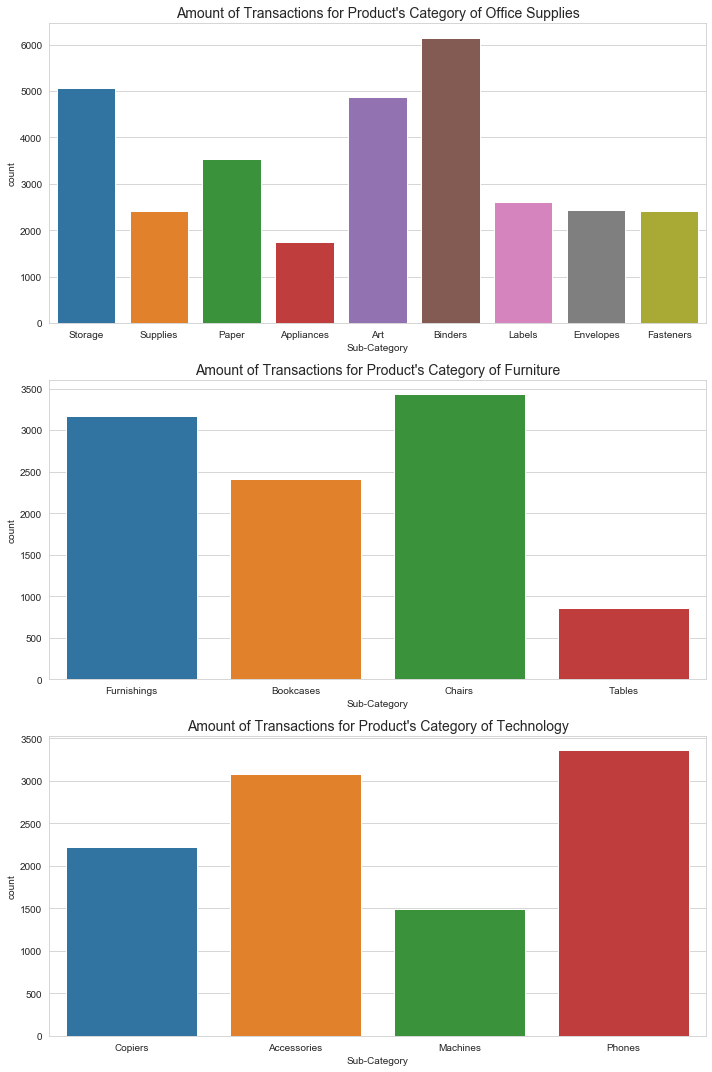

In [51]:
# Amount of transactions based on 'Category' feature with different sub-categories
fig, ax = plt.subplots(3, 1, figsize = (10, 15))
for idx, val in enumerate(superstore['Category'].unique()):
    sns.countplot(superstore[superstore['Category'] == val]['Sub-Category'], ax = ax[idx])
    ax[idx].set_title(f"Amount of Transactions for Product's Category of {val}", fontsize = 14)
plt.tight_layout()

## 2.8. Sales

There is no information whether the 'Sales' feature is price of one item or total price (including quantity) of the item. I will look into this.

In [52]:
# Round to 2 decimal points
superstore['Sales'] = superstore['Sales'].round(2)

In [53]:
# Looking for sales for one sample product
item_sample = superstore['Product Name'].sample().values[0]
superstore[superstore['Product Name'] == item_sample][['Product Name', 'Sales', 'Quantity',
                                                       'Discount', 'Profit', 'Shipping Cost']]

,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
2143,"Advantus Clamps, Assorted Sizes",117.18,7,0.00,15.1200,9.69
2202,"Advantus Clamps, Assorted Sizes",17.86,2,0.20,-2.7040,1.51
2209,"Advantus Clamps, Assorted Sizes",8.93,2,0.60,-11.6320,0.21
3582,"Advantus Clamps, Assorted Sizes",69.47,5,0.17,-4.3290,4.26
4708,"Advantus Clamps, Assorted Sizes",26.62,3,0.47,-17.6634,3.74
5311,"Advantus Clamps, Assorted Sizes",100.44,6,0.00,12.9600,4.43
7960,"Advantus Clamps, Assorted Sizes",22.32,2,0.00,1.7600,1.54
9522,"Advantus Clamps, Assorted Sizes",33.48,4,0.50,-24.8400,9.12
10679,"Advantus Clamps, Assorted Sizes",44.64,4,0.00,3.5200,2.28
11685,"Advantus Clamps, Assorted Sizes",41.85,5,0.50,-31.0500,2.55


Quick look into the above data, it seems 'Sales' feature has already accounted 'Quantity' and 'Discount' features. I conclude that 'Sales' feature describe total discounted price paid by customer (excluding shipping cost) for that particular item. I try to make new feature named 'Item Price' which describes price for one item with this formula: 

$$Item\_Price = {Sales \over Quantity ^* (1 - Discount)}$$

In [54]:
# Making new feature named 'Item Price'
superstore['Item Price'] = superstore['Sales'] / (superstore['Quantity'] * (1 - superstore['Discount']))
# Rounding to 2 decimal points
superstore['Item Price'] = superstore['Item Price'].round(2)

Text(0.5, 1.0, "Distribution of Product's Price")

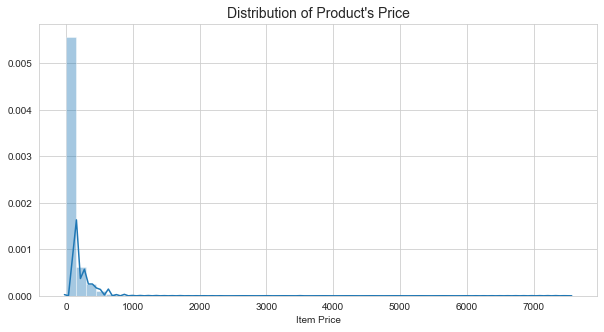

In [55]:
# Distribution of 'Item Price' feature
plt.figure(figsize = (10, 5))
sns.distplot(superstore['Item Price'])
plt.title("Distribution of Product's Price", fontsize = 14)

There are items that very expensive (almost up USD 7,000). I will look into these data.

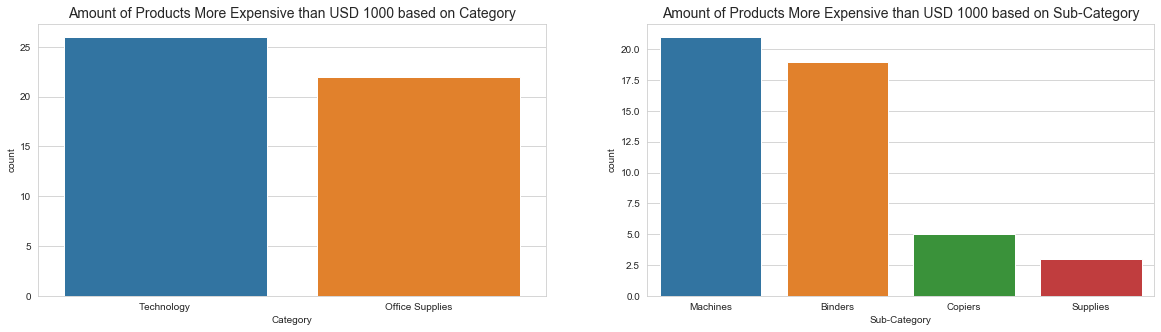

In [56]:
# Amount of products more expensive than USD 1000 based on 'Category' and 'Sub-Category' features
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
for idx, val in enumerate(['Category', 'Sub-Category']):
    sns.countplot(superstore[superstore['Item Price'] > 1000][val], ax = ax[idx])
    ax[idx].set_title(f'Amount of Products More Expensive than USD 1000 based on {val}', fontsize = 14)

In [57]:
# Looking into products more expensive than USD 1000
superstore[superstore['Item Price'] > 1000][['Product Name', 
                                             'Item Price']].sort_values('Item Price', ascending = False)

,Product Name,Item Price
28612,Cisco TelePresence System EX90 Videoconferenci...,7546.16
15886,Cubify CubeX 3D Printer Triple Head Print,3999.99
38234,Canon imageCLASS 2200 Advanced Copier,3499.99
29946,Canon imageCLASS 2200 Advanced Copier,3499.99
38848,Canon imageCLASS 2200 Advanced Copier,3499.99
8898,Canon imageCLASS 2200 Advanced Copier,3499.99
39039,Canon imageCLASS 2200 Advanced Copier,3499.99
43453,Cubify CubeX 3D Printer Double Head Print,2999.99
13713,Cubify CubeX 3D Printer Double Head Print,2999.99
25060,Cubify CubeX 3D Printer Double Head Print,2999.98


After a quick search, it seems that those are the actual price for their respective items. Below are some examples of the actual products with their actual price.

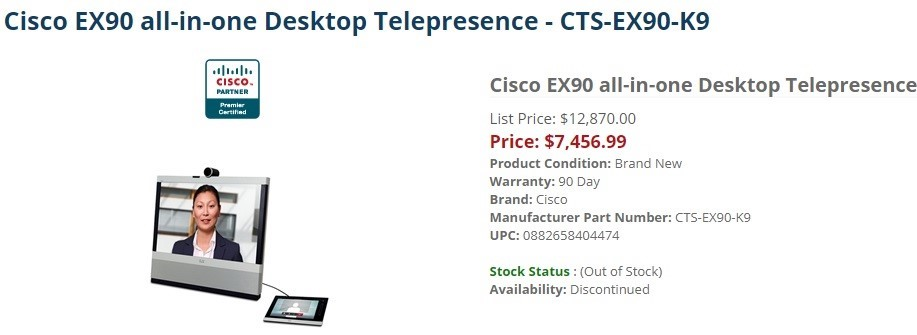

In [58]:
# Price of the the most expensive product sold in the store
from IPython.display import Image
Image('assets/cisco.jpg')
## Source: https://www.ipphone-warehouse.com/Cisco-TelePresence-EX90-p/cts-ex90-k9.htm

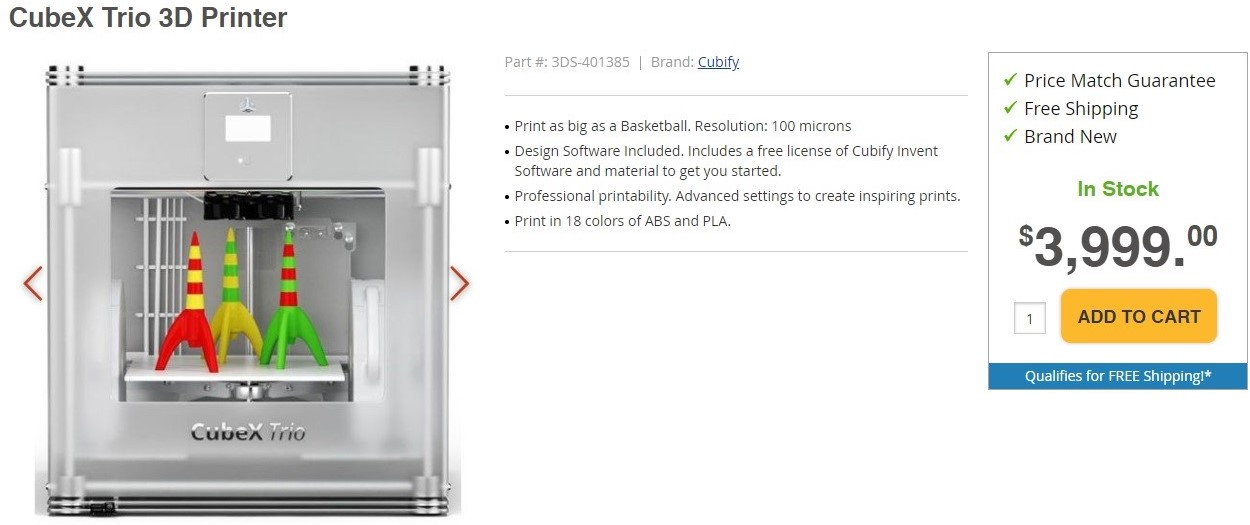

In [59]:
# Price of the 2nd most expensive product sold in the store
Image('assets/cubex.jpg')
## Source: https://www.mybinding.com/cubex-trio-3d-printer.html

Next, I try to look whether orders for expensive items only come from corporate customers or not.

Text(0.5, 1.0, 'Amount of Customers based on Segment who Bought Products which Cost more than USD 1000')

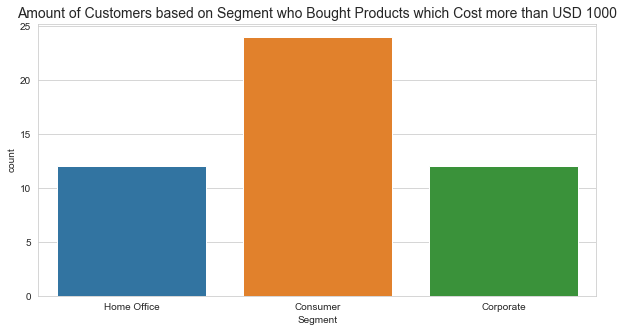

In [60]:
# Amount of customers based on 'Segment' feature who bought a product which costs more than USD 1000
plt.figure(figsize = (10, 5))
sns.countplot(superstore[superstore['Item Price'] > 1000]['Segment'])
plt.title('Amount of Customers based on Segment who Bought Products which Cost more than USD 1000', fontsize = 14)

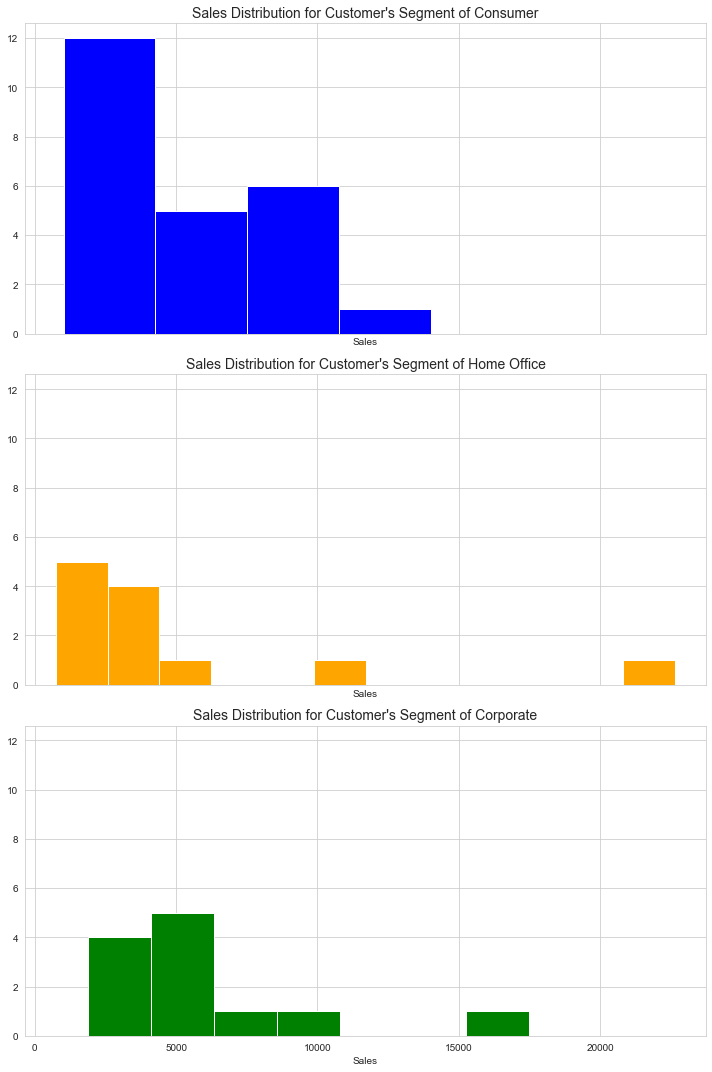

In [61]:
# Distribution of sales based on 'Segment' feature that bought a product which costs more than USD 1000
color = ['blue', 'orange', 'green']
fig, ax = plt.subplots(3, 1, figsize = (10, 15), sharex = True, sharey = True)
for idx, val in enumerate(superstore['Segment'].unique()):
    sns.distplot(superstore[(superstore['Item Price'] > 1000) & (superstore['Segment'] == val)]['Sales'], kde = False,
                 color = color[idx], ax = ax[idx], hist_kws = {'alpha' : 1})
    ax[idx].set_title(f"Sales Distribution for Customer's Segment of {val}", fontsize = 14)
plt.tight_layout()

In [62]:
# Amount of sales based on 'Segment' feature that bought a product which costs more than USD 1000
superstore[superstore['Item Price'] > 1000].groupby('Segment')['Sales'].sum()

Segment
Consumer       120585.17
Corporate       69283.68
Home Office     62430.80
Name: Sales, dtype: float64

From the charts and summary above, it seems that individual consumers spend as much as (maybe even more than) home office and corporate so my assumption is not correct.

## 2.9. Quantity

I try to look if there is anything unusual with 'Quantity' feature.

Text(0.5, 1.0, 'Amount of Transactions based on Quantity')

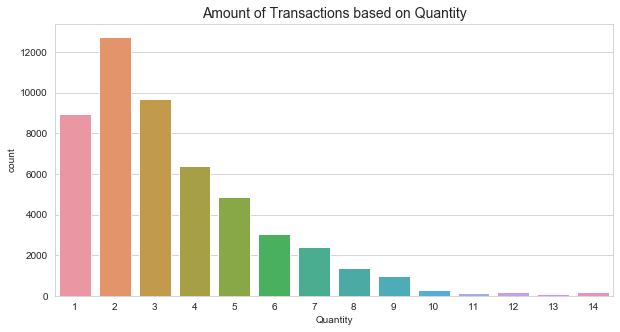

In [63]:
# Amount of transactions based on 'Quantity' feature
plt.figure(figsize = (10, 5))
sns.countplot(superstore['Quantity'])
plt.title('Amount of Transactions based on Quantity', fontsize = 14)

Text(0.5, 1.0, 'Distribution of Item Price for Products which were Bought more than 9')

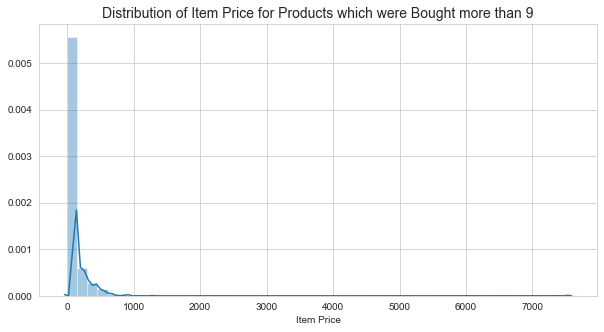

In [64]:
# Distribution of item price for products which were bought more than 9 on one transaction
plt.figure(figsize = (10, 5))
sns.distplot(superstore[superstore['Quantity'] == 6]['Item Price'])
plt.title('Distribution of Item Price for Products which were Bought more than 9', fontsize = 14)

Text(0.5, 1.0, 'Amount of Transactions based on Segment (Quantity > 9 and Price > USD 200)')

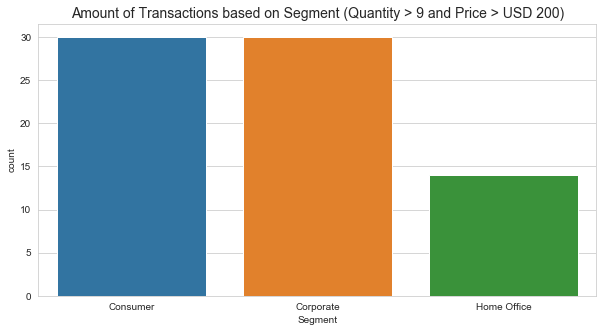

In [65]:
# Amount of transactions for products which have price more than USD 200 
# and were bought more than 9 on one transaction based on 'Segment' feature
plt.figure(figsize = (10, 5))
sns.countplot(superstore[(superstore['Quantity'] > 9)&(superstore['Item Price'] > 200)]['Segment'])
plt.title('Amount of Transactions based on Segment (Quantity > 9 and Price > USD 200)', fontsize = 14)

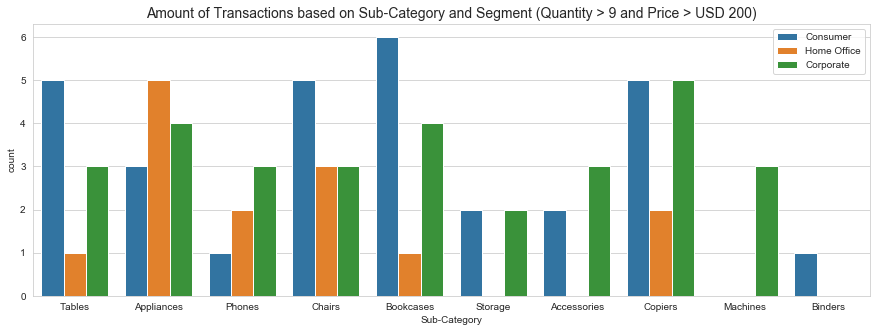

In [66]:
# Amount of transactions for products which have price more than USD 200 
# and were bought more than 9 on one transaction based on 'Sub-Category' and 'Segment' features
# for products 
plt.figure(figsize = (15, 5))
sns.countplot(superstore[(superstore['Quantity'] > 9)&(superstore['Item Price'] > 200)]['Sub-Category'], 
              hue = superstore['Segment'], hue_order = ['Consumer', 'Home Office', 'Corporate'])
plt.title('Amount of Transactions based on Sub-Category and Segment (Quantity > 9 and Price > USD 200)', fontsize = 14)
plt.legend(loc = 'upper right')

Looking at the charts above, I did not note anything unusual regarding 'Quantity' feature. I look into 'Segment' and 'Sub-Category' features and I did not see any peculiar transaction (I assume it is normal to buy tables and chairs in large quantity, etc.)

## 2.10. Discount, Profit

I try to look if there is anything unusual within 'Discount' and 'Profit' features.

In [67]:
# Round to 2 decimal points
superstore[['Discount', 'Profit']] = superstore[['Discount', 'Profit']].round(2)

In [68]:
print(f"The lowest discount given by the store is {superstore['Discount'].min()*100}%")
print(f"The highest discount given by the store is {superstore['Discount'].max()*100}%")

The lowest discount given by the store is 0.0%
The highest discount given by the store is 85.0%


In [69]:
print(f"The highest profit gained by the store is USD {superstore['Profit'].max()}")
print(f"The highest loss suffered by the store is USD {abs(superstore['Profit'].min())}")

The highest profit gained by the store is USD 8399.98
The highest loss suffered by the store is USD 6599.98


Text(0.5, 1.0, 'Distribution of Profit')

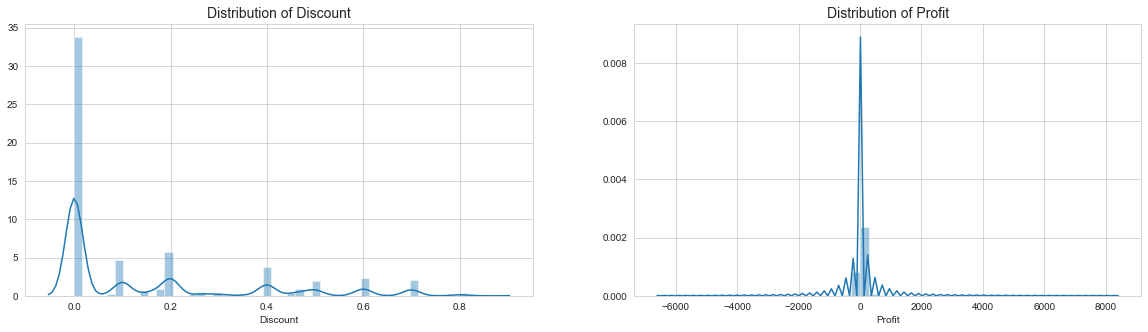

In [70]:
# Distribution of 'Discount' and 'Profit' features
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.distplot(superstore['Discount'], ax = ax[0])
ax[0].set_title('Distribution of Discount', fontsize = 14)
sns.distplot(superstore['Profit'], ax = ax[1])
ax[1].set_title('Distribution of Profit', fontsize = 14)

Looking at above chart, there is nothing unusual for 'Discount' feature. Most of the transactions did not have discount and only small amount of transactions that have discounts more than 50%. However, looking at 'Profit' feature, there is wide margin between profit and loss. There were transactions that make profit up to USD 8000 but there were also transactions that make loss up to USD 6000. I will look into this.

Text(0.5, 1.0, 'Distribution of Discount (Profit > 2000)')

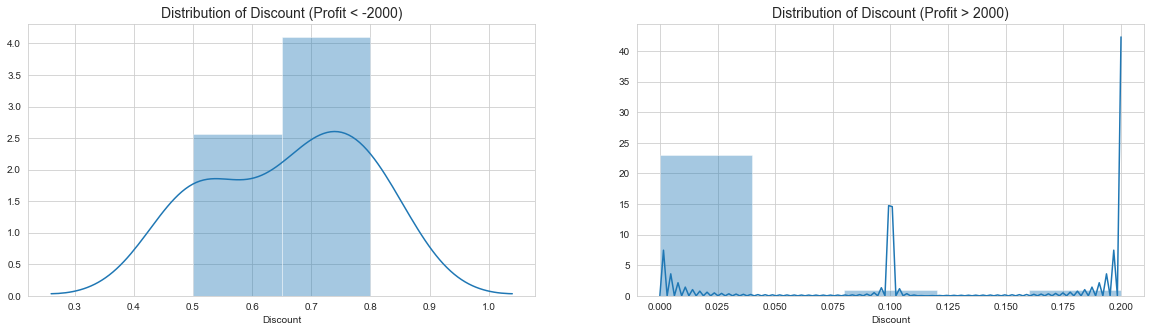

In [71]:
# Distribution of discount based on 'Profit' feature
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.distplot(superstore[superstore['Profit'] < -2000]['Discount'], ax = ax[0])
ax[0].set_title('Distribution of Discount (Profit < -2000)', fontsize = 14)
sns.distplot(superstore[superstore['Profit'] > 2000]['Discount'], ax = ax[1])
ax[1].set_title('Distribution of Discount (Profit > 2000)', fontsize = 14)

Text(0.5, 1.0, 'Gained Profit when Discount Rate is More than 50%')

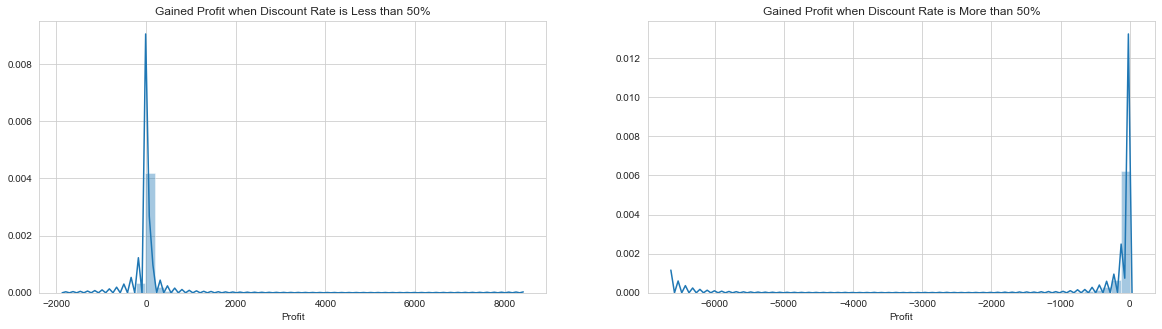

In [72]:
# Distribution of profit based on 'Discount' feature
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.distplot(superstore[superstore['Discount'] < 0.5]['Profit'], ax = ax[0])
ax[0].set_title('Gained Profit when Discount Rate is Less than 50%')
sns.distplot(superstore[superstore['Discount'] > 0.5]['Profit'], ax = ax[1])
ax[1].set_title('Gained Profit when Discount Rate is More than 50%')

In [73]:
# Listing customers that have transactions with discount rate more than 50%
superstore[superstore['Discount'] > 0.5]['Customer Name'].value_counts()

Darrin Van Huff      21
Craig Reiter         20
Anthony Jacobs       19
Phillina Ober        18
Ralph Arnett         18
Sean Christensen     18
Joni Sundaresam      17
Jay Fein             17
Lycoris Saunders     16
Ben Peterman         16
Darren Powers        16
Michael Kennedy      15
Lori Olson           15
Daniel Lacy          15
Bobby Trafton        15
Phillip Breyer       15
Rick Reed            15
Annie Zypern         15
Eugene Hildebrand    15
Tamara Chand         15
Shaun Chance         15
Laurel Beltran       14
Sean Braxton         14
Natalie Webber       14
Tim Brockman         14
Don Weiss            14
Maureen Gastineau    14
Alan Haines          14
Cari Sayre           14
Philip Brown         13
                     ..
Bryan Spruell         1
Helen Wasserman       1
Jamie Kunitz          1
Mathew Reese          1
Ionia McGrath         1
Dana Kaydos           1
Charles McCrossin     1
Bill Donatelli        1
Caroline Jumper       1
Hunter Lopez          1
Thea Hudgings   

In [74]:
# Listing discounts of customer with most transactions having discount rate more than 50%
superstore[superstore['Customer Name'] == 'Craig Reiter']['Discount'].value_counts()

0.00    27
0.60    11
0.10     9
0.70     9
0.20     7
0.50     5
0.40     4
0.47     3
0.30     1
0.07     1
Name: Discount, dtype: int64

In [75]:
# Listing countries that have transactions with discount rate more than 50%
superstore[superstore['Discount'] > 0.5]['Country'].value_counts()

Turkey                  1378
Nigeria                  905
United States            856
Brazil                   380
Kazakhstan               101
Zimbabwe                  80
France                    50
Lithuania                 50
Italy                     44
Argentina                 43
Uganda                    37
Yemen                     30
Turkmenistan              25
Dominican Republic        21
Honduras                  16
Germany                   15
Haiti                     14
United Arab Emirates      14
Sweden                    14
New Zealand               11
Philippines               10
Panama                     8
Australia                  7
Pakistan                   7
Spain                      6
Venezuela                  6
Denmark                    5
Trinidad and Tobago        5
Thailand                   4
United Kingdom             4
Vietnam                    4
Myanmar (Burma)            4
South Korea                4
Netherlands                4
Peru          

In [76]:
# Listing discounts of country with most transactions having discount rate more than 50%
superstore[superstore['Country'] > 'Turkey']['Discount'].value_counts()

0.00    6554
0.20    3658
0.70     610
0.40     406
0.10     339
0.80     304
0.30     278
0.50     185
0.17     166
0.60     138
0.15      52
0.27      44
0.37      29
0.32      27
0.47      22
0.45      11
0.57       4
Name: Discount, dtype: int64

In [77]:
# Listing products that have transactions with discount rate more than 50%
superstore[superstore['Discount'] > 0.5]['Product Name'].value_counts()

Rogers File Cart, Single Width                                            11
Smead Lockers, Single Width                                               11
Acco Index Tab, Clear                                                      9
Avery Index Tab, Clear                                                     9
Stockwell Thumb Tacks, Metal                                               9
Hewlett Copy Machine, Color                                                8
Sanford Canvas, Water Color                                                8
Avery Hole Reinforcements, Clear                                           8
Smead File Cart, Single Width                                              8
Stanley Sketch Pad, Easy-Erase                                             8
GBC Instant Report Kit                                                     8
Ibico Index Tab, Clear                                                     8
Sanford Markers, Fluorescent                                               8

In [78]:
# Listing discounts of product with most transactions having discount rate more than 50%
superstore[superstore['Product Name'] ==  'Smead Lockers, Single Width']['Discount'].value_counts()

0.10    12
0.00    12
0.60     8
0.40     5
0.70     3
0.47     2
0.17     1
Name: Discount, dtype: int64

Looking at all summaries above, it seemes there were no specific relationships related to 'Discount' feature. I assume that it is quite random and was not significantly affected to other factors.

## 2.11. Shipping Cost

Lastly, I will check 'Shipping Cost' feature. I assume that shipping cost is highly related to products and destination country.

In [79]:
# Round to 2 decimal points
superstore['Shipping Cost'] = superstore['Shipping Cost'].round(2)

Text(0.5, 1.0, 'Distribution of Shipping Cost')

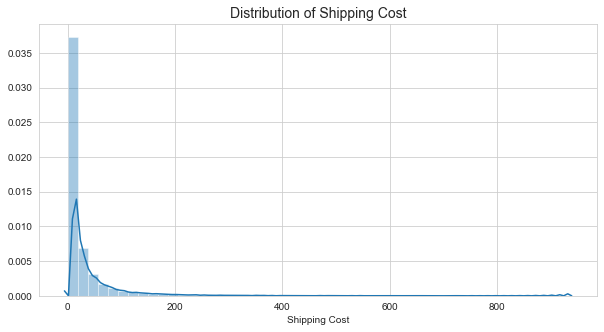

In [80]:
# Distribution of 'Shipping Cost' feature
plt.figure(figsize = (10, 5))
sns.distplot(superstore['Shipping Cost'])
plt.title('Distribution of Shipping Cost', fontsize = 14)

Looking at the chart, there is shipping cost that exceeds USD 200 and up to USD 800. I will look into this.

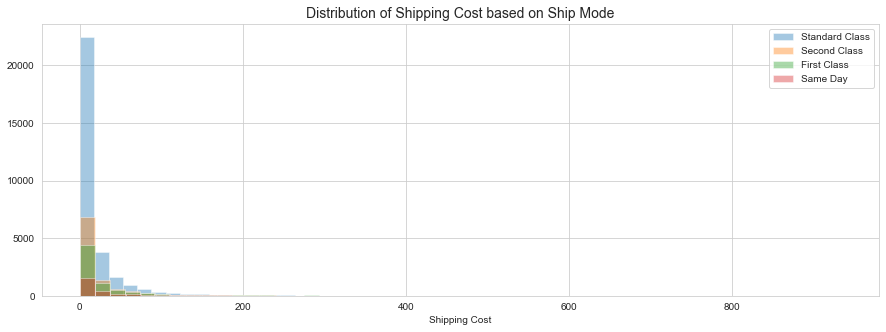

In [81]:
# Distribution of shipping cost based on 'Ship Mode' feature
plt.figure(figsize = (15, 5))
for mode in superstore['Ship Mode'].unique():
    sns.distplot(superstore[superstore['Ship Mode'] == mode]['Shipping Cost'], label = mode, kde = False)
plt.title('Distribution of Shipping Cost based on Ship Mode', fontsize = 14)
plt.legend()

Text(0.5, 1.0, 'Amount of Transactions based on Market (Shipping Cost > USD 200)')

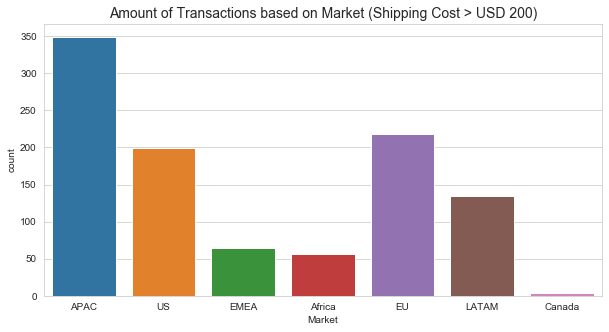

In [82]:
# Amount of transactions with shipping cost more than USD 200 based on 'Market' feature
plt.figure(figsize = (10, 5))
sns.countplot(superstore[superstore['Shipping Cost'] > 200]['Market'])
plt.title('Amount of Transactions based on Market (Shipping Cost > USD 200)', fontsize = 14)

Text(0.5, 1.0, "Amount of Transactions based on Product's Sub-Category (Shipping Cost > USD 200)")

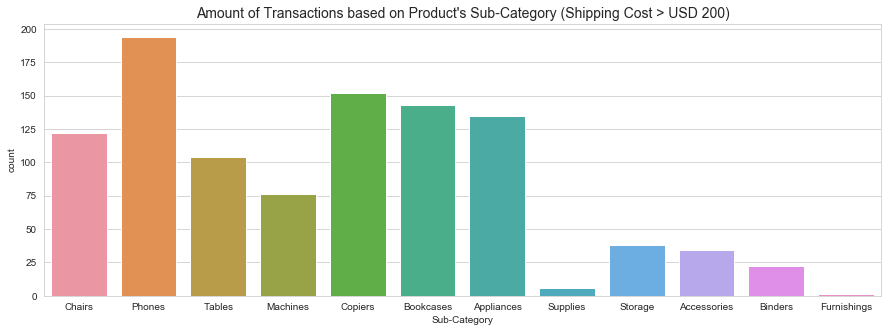

In [83]:
# Amount of transactions with shipping cost more than USD 200 based on 'Sub-Category' feature
plt.figure(figsize = (15, 5))
sns.countplot(superstore[superstore['Shipping Cost'] > 200]['Sub-Category'])
plt.title("Amount of Transactions based on Product's Sub-Category (Shipping Cost > USD 200)", fontsize = 14)

There is something interesting when we see markets that have shipping cost more than USD 200. US and LATAM which I considered so close to USA actually have high shipping cost. I assume that there were many factors affecting shipping cost such as weight of the products (which is not described in the data), product type, destination, etc.  

# 3. EDA & Data Visualization

In [84]:
# Making dataframe which lists transactions based on order ID
new_data = list()

for od_id in superstore['Order ID'].unique():
    new_new_data = list()
    for col in superstore.drop(['Product ID', 'Sub-Category', 'Product Name', 'Item Price', 'Discount'], axis = 1).columns:
        if col == 'Order ID':
            new_new_data.append(od_id)
        elif col == 'Category':
            if superstore[superstore['Order ID'] == od_id]['Category'].nunique() > 1:
                x = list(superstore[superstore['Order ID'] == od_id]['Category'].unique())
                x.sort()
                new_new_data.append(', '.join(x))
            else:
                new_new_data.append(superstore[superstore['Order ID'] == od_id][col].unique()[0])
        elif col == 'Quantity' or col == 'Sales' or col == 'Profit' or col == 'Shipping Cost':
            new_new_data.append(superstore[superstore['Order ID'] == od_id][col].sum())
        else:
            new_new_data.append(superstore[superstore['Order ID'] == od_id][col].unique()[0])
    new_data.append(new_new_data)
            
df_trans = pd.DataFrame(new_data, 
                        columns = superstore.drop(['Product ID', 'Sub-Category', 'Product Name', 'Item Price', 'Discount'], 
                                                  axis = 1).columns).round(2)

In [85]:
# Making new features
import datetime as dt
df_trans['Day'] = df_trans['Order Date'].dt.weekday_name
df_trans['Date'] = df_trans['Order Date'].dt.day
df_trans['Month'] = df_trans['Order Date'].dt.month_name()
df_trans['Year'] = df_trans['Order Date'].dt.year

In [86]:
df_trans.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Market,Category,Sales,Quantity,Profit,Shipping Cost,Order Priority,Elapsed Time,Day,Date,Month,Year
0,AG-2011-2040,2011-01-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Algeria,Africa,Office Supplies,408.30,2,106.14,35.46,Medium,5,Saturday,1,January,2011
1,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Joseph Holt,Consumer,Australia,APAC,"Furniture, Office Supplies",289.28,10,89.15,16.22,Medium,7,Saturday,1,January,2011
2,HU-2011-1220,2011-01-01,Second Class,AT-10735,Annie Thurman,Consumer,Hungary,EMEA,Office Supplies,66.12,4,29.64,8.17,High,4,Saturday,1,January,2011
3,IT-2011-3647632,2011-01-01,Second Class,EM-14140,Eugene Moren,Home Office,Sweden,EU,Office Supplies,44.86,3,-26.06,4.82,High,4,Saturday,1,January,2011
4,IN-2011-30733,2011-02-01,Second Class,PO-18865,Patrick O'Donnell,Consumer,Bangladesh,APAC,"Office Supplies, Technology",369.45,13,102.69,77.50,Critical,2,Tuesday,1,February,2011


One of the basis of conducting RFM Analysis is Pareto's principle which in this case is 80% of the profit comes from 20% of customers. I will try to look into this.

In [87]:
# Proofing 80/20
cust_series = df_trans.groupby('Customer Name').sum()['Sales'].sort_values(ascending = False)
sales_80 = 0.8 * cust_series.sum()

sum_sales = 0
customer = 1
for sales in cust_series:
    sum_sales += sales
    customer += 1
    if sum_sales >= sales_80:
        break

percent_customer = round(customer * 100 / len(cust_series))
print(f"{percent_customer}% customers gives 80% of the superstore's sales")

70% customers gives 80% of the superstore's sales


Looking at the above result, condition of the Pareto's principle was not fulfilled. However, there was no problem with this and I will continue analyzing the dataset by visualization.

Text(0.5, 1.0, 'Amount of Transactions based on Elapsed Time')

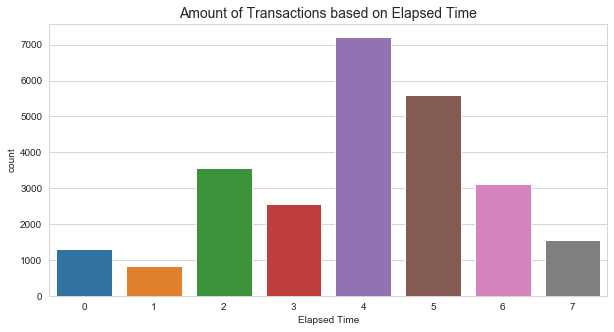

In [88]:
# Amount of transactions based on 'Elapsed Time' feature
plt.figure(figsize = (10, 5))
sns.countplot(df_trans['Elapsed Time'])
plt.title('Amount of Transactions based on Elapsed Time', fontsize = 14)

Text(0.5, 1.0, 'Amount of Transactions based on Purchase Day')

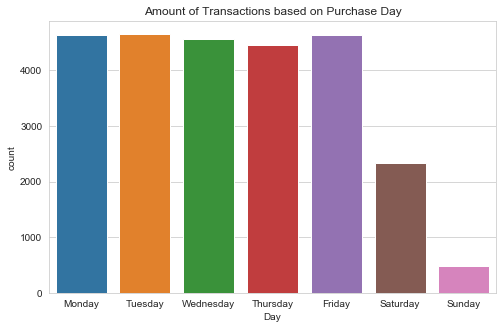

In [89]:
# Amount of transactions based on purchase day
plt.figure(figsize = (8, 5))
sns.countplot(df_trans['Day'], order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Amount of Transactions based on Purchase Day')

Text(0.5, 1.0, 'Amount of Transactions based on Purchase Date')

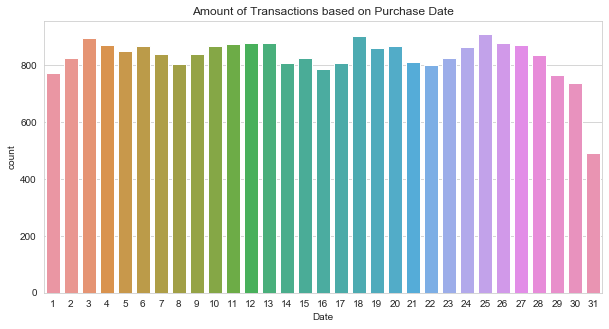

In [90]:
# Amount of transactions based on purchase date
plt.figure(figsize = (10, 5))
sns.countplot(df_trans['Date'], order = [i for i in range(1, 32)])
plt.title('Amount of Transactions based on Purchase Date')

Text(0.5, 1.0, 'Amount of Transactions based on Purchase Month')

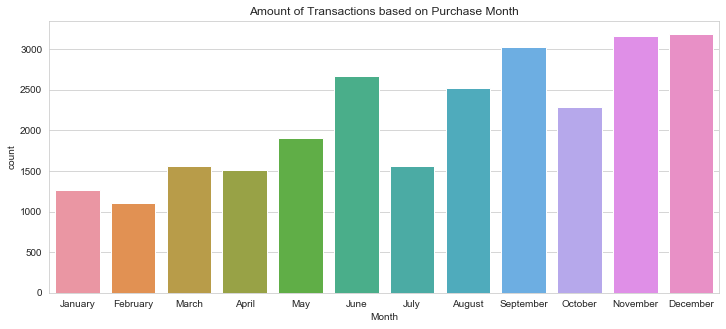

In [91]:
# Amount of transactions based on month
plt.figure(figsize = (12, 5))
sns.countplot(df_trans['Month'], order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                                          'August', 'September', 'October', 'November', 'December'])
plt.title('Amount of Transactions based on Purchase Month')

Text(0.5, 1.0, 'Amount of Transactions based on Purchase Year')

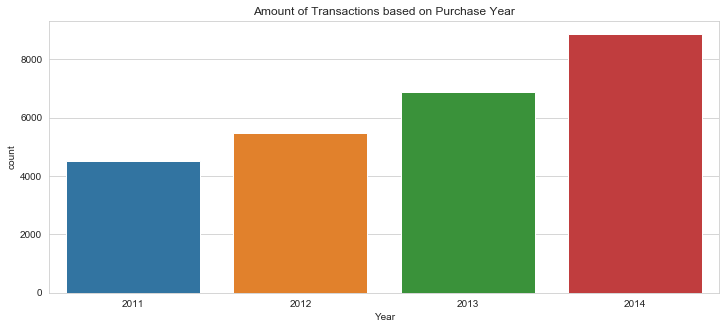

In [92]:
# Amount of transactions based on year
plt.figure(figsize = (12, 5))
sns.countplot(df_trans['Year'], order = [2011, 2012, 2013, 2014])
plt.title('Amount of Transactions based on Purchase Year')

I assume that there is relationship between 'Ship Mode', 'Order Priority' features and 'Elapsed Time' feature. I will look into this.

Text(0.5, 1.0, 'Amount of Transactions based on Shipping Mode')

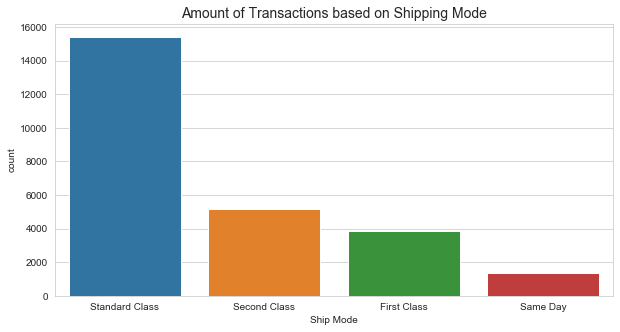

In [93]:
# Amount of transaction based on 'Ship Mode' feature
plt.figure(figsize = (10, 5))
sns.countplot(df_trans['Ship Mode'])
plt.title('Amount of Transactions based on Shipping Mode', fontsize = 14)

Text(0.5, 1.0, 'Amount of Transactions based on Order Priority')

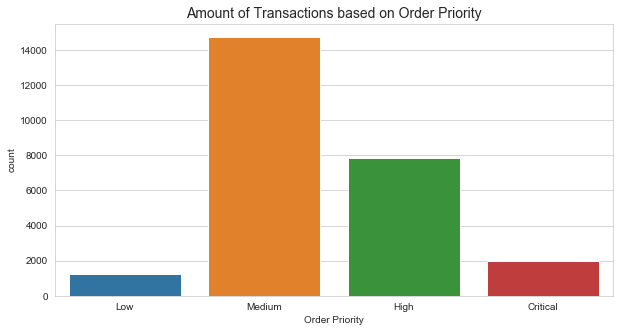

In [94]:
# Amount of transaction based on 'Order Priority' feature
plt.figure(figsize = (10, 5))
sns.countplot(df_trans['Order Priority'], order = ['Low', 'Medium', 'High', 'Critical'])
plt.title('Amount of Transactions based on Order Priority', fontsize = 14)

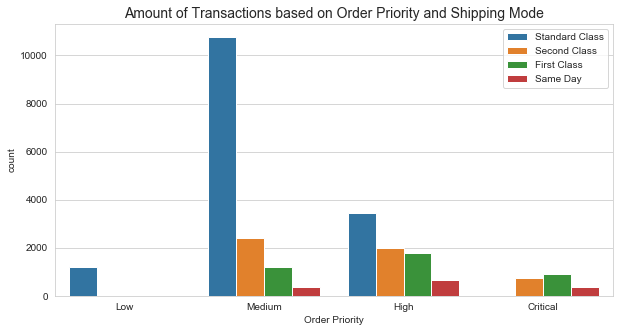

In [95]:
# Amount of transaction based on 'Order Priority' feature with different 'Ship Mode'
plt.figure(figsize = (10, 5))
sns.countplot(data = df_trans, x = 'Order Priority', hue = 'Ship Mode', order = ['Low', 'Medium', 'High', 'Critical'])
plt.title('Amount of Transactions based on Order Priority and Shipping Mode', fontsize = 14)
plt.legend(loc = 'upper right')

Text(0.5, 1.0, 'Amount of Transactions based on Elapsed Time and Shipping Mode')

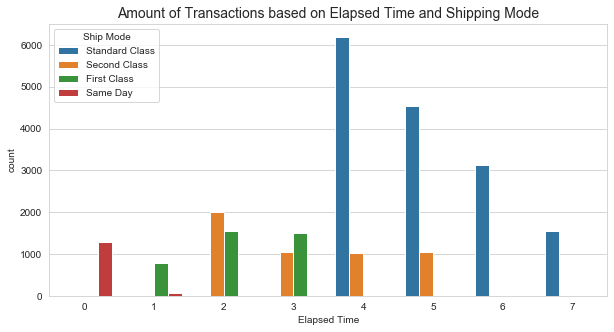

In [96]:
# Amount of transaction based on 'Elapsed Time' feature with different 'Ship Mode'
plt.figure(figsize = (10, 5))
sns.countplot(data = df_trans, x = 'Elapsed Time', hue = 'Ship Mode')
plt.title('Amount of Transactions based on Elapsed Time and Shipping Mode', fontsize = 14)

From the chart above, it is obvious that 'Same Day' transactions are processed on the same day even though some of them are processed the next day. 'First Class' transactions are processed between 1 and 3 days. 'Second Class' transactions are processed between 2 and 5 days. 'Standard Class' transactions are processed between 4 and 7 days.

Text(0.5, 1.0, 'Amount of Transactions based on Elapsed Time and Order Priority')

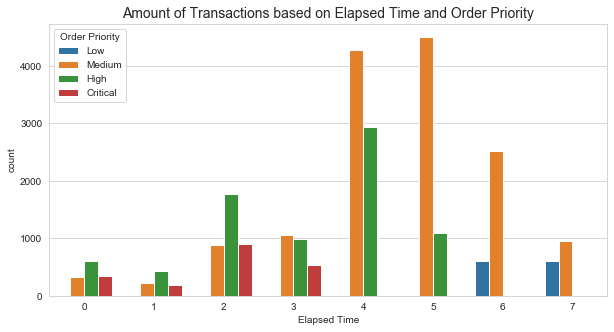

In [97]:
# Amount of transaction based on 'Elapsed Time' feature with different 'Order Priority'
plt.figure(figsize = (10, 5))
sns.countplot(data = df_trans, x = 'Elapsed Time', 
              hue = 'Order Priority', hue_order = ['Low', 'Medium', 'High', 'Critical'])
plt.title('Amount of Transactions based on Elapsed Time and Order Priority', fontsize = 14)

From the chart above, there seems to be a pattern between 'Ship Mode' and 'Order Priority' features. Low-priority orders are processed between 6 and 7 days. Medium-priority orders are the most varied since they can be processed on the same day but they also can be processed after a week. High-priority orders are processed between 0 and 5 days. Critical-priority orders are processed between 0 - 3 days.

Text(0.5, 1.0, "Amount of Transactions based on Customer's Segment")

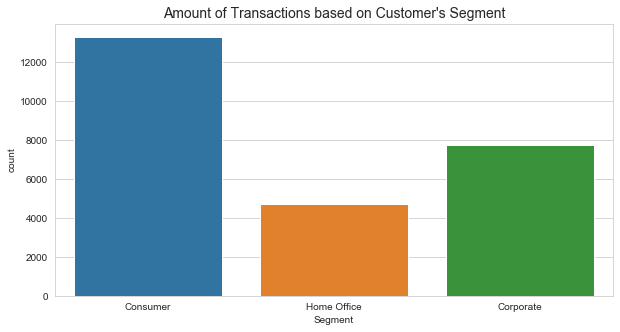

In [98]:
# Amount of transactions based on 'Segment' feature
plt.figure(figsize = (10, 5))
sns.countplot(df_trans['Segment'])
plt.title("Amount of Transactions based on Customer's Segment", fontsize = 14)

Text(0.5, 1.0, 'Amount of Transactions based on Market')

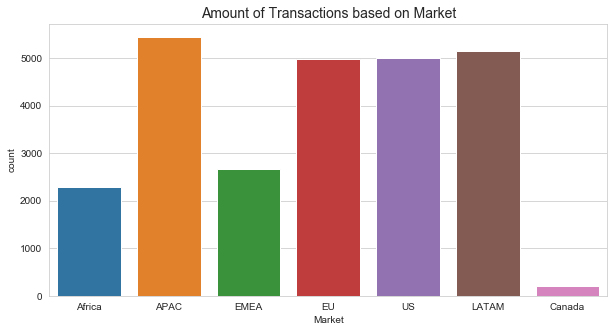

In [99]:
# Amount of transactions based on 'Market' feature
plt.figure(figsize = (10, 5))
sns.countplot(df_trans['Market'])
plt.title('Amount of Transactions based on Market', fontsize = 14)

Text(0.5, 1.0, "Amount of Transactions based on Product's Category")

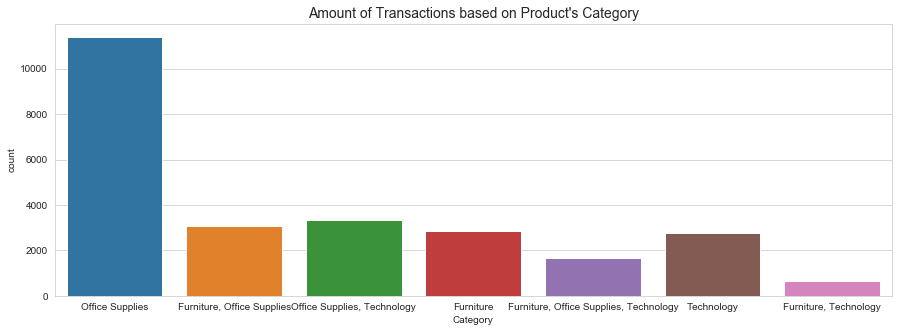

In [100]:
# Amount of transactions based 'Category' feature
plt.figure(figsize = (15, 5))
sns.countplot(df_trans['Category'])
plt.title("Amount of Transactions based on Product's Category", fontsize = 14)

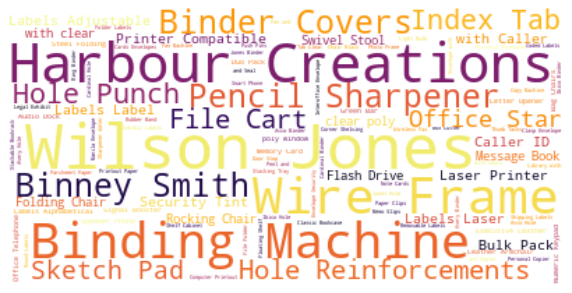

In [101]:
# Making wordcloud
from wordcloud import WordCloud
word = superstore['Product Name']
text = ', '.join(prod for prod in word)
wordcloud = WordCloud(stopwords = ['Color', 'Set', 'of', 'High', 'Speed', 'Easy', 
                                   'Erase', 'Single', 'Width', 'Full', 'Size', 'Sizes'], 
                      background_color= 'white', colormap = 'inferno').generate(text)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Exporting Data

In [102]:
superstore.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Elapsed Time,Item Price
0,AG-2011-2040,2011-01-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,Medium,5,204.15
1,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Joseph Holt,Consumer,Australia,APAC,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,Medium,7,44.58
2,HU-2011-1220,2011-01-01,Second Class,AT-10735,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,High,4,16.53
3,IT-2011-3647632,2011-01-01,Second Class,EM-14140,Eugene Moren,Home Office,Sweden,EU,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86,3,0.5,-26.06,4.82,High,4,29.91
4,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Joseph Holt,Consumer,Australia,APAC,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,Medium,7,25.26


In [103]:
# Final check for duplicate data
superstore[superstore.duplicated(keep = False)]

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Elapsed Time,Item Price


In [104]:
# Reorder the columns
superstore = superstore[['Order Date','Order ID', 'Customer Name', 'Customer ID', 'Segment', 
                         'Country', 'Market', 'Product ID', 'Category', 'Sub-Category', 
                         'Product Name', 'Item Price', 'Quantity', 'Discount', 'Sales',
                        'Profit', 'Ship Mode', 'Elapsed Time', 'Shipping Cost', 'Order Priority']]

In [105]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
Order Date        51290 non-null datetime64[ns]
Order ID          51290 non-null object
Customer Name     51290 non-null object
Customer ID       51290 non-null object
Segment           51290 non-null object
Country           51290 non-null object
Market            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Item Price        51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Sales             51290 non-null float64
Profit            51290 non-null float64
Ship Mode         51290 non-null object
Elapsed Time      51290 non-null int64
Shipping Cost     51290 non-null float64
Order Priority    51290 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(12)
memory usage: 7.8+ M

In [106]:
# Exporting data
superstore.to_csv('datasets/superstore_clean.csv', index = False)
wordcloud.to_file('assets/wordcloud.png')
df_trans.to_csv('datasets/superstore_od_id.csv', index = False)